In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import pandas as pd
from scipy.stats import linregress
from scipy.interpolate import interp1d
import matplotlib.dates as mdates

In [2]:
#Données Novembre-Décembre 
#données bodenquellen 
data_271 = pd.read_excel("SP_CHYN271_2024-12-16_11_03_29.xlsx")
data_272 = pd.read_excel("SP_CHYN272_2024-12-16_11_17_35.xlsx")
data_273 = pd.read_excel("SP_CHYN273_2024-12-16_11_32_19.xlsx")
data_274 = pd.read_excel("SP_CHYN274_2024-12-16_11_45_47.xlsx")

#données fluelabach
data_276 = pd.read_excel("SP_CHYN276_2024-12-16_12_31_22.xlsx")

#données felsenquelle hf
data_277 = pd.read_excel("SP_CHYN277_2024-12-16_10_25_21.xlsx")

#données BQ1 pression atmmopshérique et température 
data_261 = pd.read_excel("SP_CHYN261_2024-12-16_10_52_29.xlsx")

In [3]:
cond_271 = data_271["Unnamed: 6"][11:].values
mbar_271 = data_271["Unnamed: 3"][11:].values
T_271 = data_271["Unnamed: 4"][11:].values
cond_271_12 = data_271["Unnamed: 6"][9:].values
mbar_271_12 = data_271["Unnamed: 3"][9:].values
T_271_12 = data_271["Unnamed: 4"][9:].values
temps_271 = data_271["File created from KolibriDesktop at "][11:].values
temps_271_12 = data_271["dates"][9:].values

cond_272 = data_272["Unnamed: 6"][14:].values
mbar_272 = data_272["Unnamed: 3"][14:].values
T_272 = data_272["Unnamed: 4"][14:].values
cond_272_12 = data_272["Unnamed: 6"][9:].values
mbar_272_12 = data_272["Unnamed: 3"][9:].values
T_272_12 = data_272["Unnamed: 4"][9:].values
temps_272 = data_272["File created from KolibriDesktop at "][14:].values
temps_272_12 = data_272["dates"][9:].values

cond_273 = data_273["Unnamed: 6"][14:].values
mbar_273 = data_273["Unnamed: 3"][14:].values
T_273 = data_273["Unnamed: 4"][14:].values
cond_273_12 = data_273["Unnamed: 6"][9:].values
mbar_273_12 = data_273["Unnamed: 3"][9:].values
T_273_12 = data_273["Unnamed: 4"][9:].values
temps_273 = data_273["File created from KolibriDesktop at "][14:].values
temps_273_12 = data_273["2024-12-16 11:32:32.046000.1"][9:].values

cond_274 = data_274["Unnamed: 6"][14:].values
mbar_274 = data_274["Unnamed: 3"][14:].values
T_274 = data_274["Unnamed: 4"][14:].values
cond_274_12 = data_274["Unnamed: 6"][9:].values
mbar_274_12 = data_274["Unnamed: 3"][9:].values
T_274_12 = data_274["Unnamed: 4"][9:].values
temps_274 = data_274["File created from KolibriDesktop at "][14:].values
temps_274_12 = data_274["2024-12-16 11:45:58.900000.1"][9:].values

cond_276 = data_276["Unnamed: 6"][19:].values
mbar_276 = data_276["Unnamed: 3"][19:].values
T_276 = data_276["Unnamed: 4"][19:].values
cond_276_12 = data_276["Unnamed: 6"][9:].values
mbar_276_12 = data_276["Unnamed: 3"][9:].values
T_276_12 = data_276["Unnamed: 4"][9:].values
temps_276 = data_276["File created from KolibriDesktop at "][19:].values
temps_276_12 = data_276["dates"][9:].values

cond_277 = data_277["Unnamed: 6"][21:].values
mbar_277 = data_277["Unnamed: 3"][21:].values
T_277 = data_277["Unnamed: 4"][21:].values
cond_277_12 = data_277["Unnamed: 6"][9:].values
mbar_277_12 = data_277["Unnamed: 3"][9:].values
T_277_12 = data_277["Unnamed: 4"][9:].values
temps_277 = data_277["File created from KolibriDesktop at "][21:].values
temps_277_12 = data_277["2024-12-16 10:25:30.086000.1"][9:].values

mbar_261 = data_261["Unnamed: 3"][9:].values
T_261 = data_261["Unnamed: 4"][9:].values
mbar_261_12 = data_261["Unnamed: 3"][9:].values
T_261_12 = data_261["Unnamed: 4"][9:].values
temps_261 = data_261["File created from KolibriDesktop at "][9:].values
temps_261_12 = data_261["dates"][9:].values

In [4]:
jours_271 = [(temps_271[i] - 3) / 4 / 24    for i in range(len(temps_271))]
heures_271 = [(temps_271[i] - 3) / 4    for i in range(len(temps_271))]

jours_272 = [(temps_272[i] - 3) / 4 / 24    for i in range(len(temps_272))]
heures_272 = [(temps_272[i] - 3) / 4     for i in range(len(temps_272))]

jours_273 = [(temps_273[i] - 3) / 4 / 24    for i in range(len(temps_273))]
heures_273 = [(temps_273[i] - 3) / 4     for i in range(len(temps_273))]

jours_274 = [(temps_274[i] - 3) / 4 / 24    for i in range(len(temps_274))]
heures_274 = [(temps_274[i] - 3) / 4     for i in range(len(temps_274))]

jours_276 = [(temps_276[i] - 3) / 2 / 24    for i in range(len(temps_276))]
heures_276 = [(temps_276[i] - 3) / 2     for i in range(len(temps_276))]

jours_277 = [(temps_277[i] - 3) / 2 / 24    for i in range(len(temps_277))]
heures_277 = [(temps_277[i] - 3) / 2     for i in range(len(temps_277))]

jours_261 = [(temps_261[i] - 3) / 4 / 24    for i in range(len(temps_261))]
heures_261 = [(temps_261[i] - 3) / 4     for i in range(len(temps_261))]

In [5]:
#interpolation des données 

interp_271 = interp1d(jours_271, cond_271, kind='linear')

In [6]:
print(f"\033[1mConductivités le 16.12.24 :\033[0m ")
print('--'*20)
print(f" - BQ1 : {cond_271[-2]:.3f} (sonde) vs 62.2 (CHYN7)")
print(f" - BQ2 : {cond_272[-2]:.3f} (sonde) vs 64.8 (CHYN7)")
print(f" - BQ3 : {cond_273[-2]:.3f} (sonde) vs 69.0 (CHYN7)")
print(f" - BQ4 : {cond_274[-2]:.3f} (sonde) vs 66.4 (CHYN7)")
print(f" - FB  : {cond_276[-2]:.3f} (sonde) vs 69.0 (CHYN7)")
print(f" - FQ  : {cond_277[-2]:.3f} (sonde) vs 68.5 (CHYN7)")

Conductivités le 16.12.24 : 
----------------------------------------
 - BQ1 : 75.933 (sonde) vs 62.2 (CHYN7)
 - BQ2 : 86.151 (sonde) vs 64.8 (CHYN7)
 - BQ3 : 64.610 (sonde) vs 69.0 (CHYN7)
 - BQ4 : 62.607 (sonde) vs 66.4 (CHYN7)
 - FB  : 88.303 (sonde) vs 69.0 (CHYN7)
 - FQ  : 98.722 (sonde) vs 68.5 (CHYN7)


In [7]:
# données récoltées avec le CHYN7 et hauteur

dates_mesures = np.array(['2024-11-04', '2024-12-16', '2025-01-13', '2025-02-14', '2025-03-14', '2025-04-23', '2025-05-19'], dtype='datetime64[D]')

#Bodenquelle 1 
cond_bq1 = [69, 62.2, 63.7, 62.9, 65.4, 63.5, 57.6]
T_bq1 = [7.1, 2.7, 0.6, 0.7, 1.7, 3.9, 4.9]
O2_bq1 = [9.05, 10.59, 10.77, 10.25, 9.41, 8.27, 8.16]
h_bq1 = [163.5-163.5, 163.5-177, 163.5-169, 163.5-183, 163.5-184, 163.5-162, 163.5-153]

#Bodenquelle 2
cond_bq2 = [68, 64.8, 64.1, 63.4, 64.4, 62.8, 57.5]
T_bq2 = [6.9, 2.5, 1.2, 0.9, 2.2, 3.6, 5.1]
O2_bq2 = [8.58, 10.53, 10.2, 10.34, 9.19, 8.38, 8.13]
h_bq2 = [148-148, 148-158, 148-153, 148-163, 148-164, 148-147, 148-140]

#Bodenquelle 3
cond_bq3 = [68.1, 69.0, 67.0, 65.3, 65.3, 64.7, 60.5]
T_bq3 = [6.7, 2.2, 2.4, 2.1, 2.8, 4.1, 5.3]
O2_bq3 = [8.99, 10.37, 9.67, 9.87, 9.41, 8.91, 8.60]
h_bq3 = [149-149, 149-155, 149-155, 149-159, 149-157, 149-148, 149-142]

#Bodenquelle 4
cond_bq4 = [66.1, 66.4, 65.8, 63.8, 64.3, 59.7, 55.9]
T_bq4 = [7.0, 3.4, 2.1, 2.5, 2.8, 4.5, 5.4]
O2_bq4 = [9.80, 10.85, 10.50, 10.41, 9.89, 9.42, 9.15]
h_bq4 = [202-202, 202-203, 202-200, 202-205, 202-204, 202-200, 202-200]

#Bodenquelle 5
cond_bq5 = [68.9, 69.9, 67.1, 66.5, 66.4, 66.8, 62.5]
T_bq5 = [7.3, 3.2, 3.5, 3.2, 3.6, 4.5, 5.0]
O2_bq5 = [9.03, 10.07, 9.70, 9.68, 9.29, 9.17, 9.04]
h_bq5 = [165-165, 165-168, 165-165, 165-168, 165-167, 165-166, 165-164]

#Flüelabach 
cond_fb = [72.6, 69.0, 52.6, 67.4, 69.0, 59.2, 60.3]
T_fb = [5.1, 1.0, 0.0, 0.1, 3.2, 6.2, 8.0]
O2_fb = [11.25, 12.16, 12.43, 11.54, 10.24, 9.46, 9.50]
h_fb = [124-124, 124-132, 124-130, 124-136, 124-136, 124-125, 124-116]
h_fb2 = [51-51, 51-61, np.nan, 51-67, 51-65, 51-52, 51-44]

#7 Felsenquelle 402
cond_fq = [62.5, 68.5, 75.1, 74.9, 84.3, 88.5, 70.7]
T_fq = [5.6, 7.0, 2.1, 3.1, 4.3, 5.7, 5.7]
O2_fq = [10.36, 9.80, 9.64, 9.63, 8.85, 8.92, 9.24]
h_fq = [44-44, 44-82, 44-103, 44-108, 44-108, 44-101, 44-41]



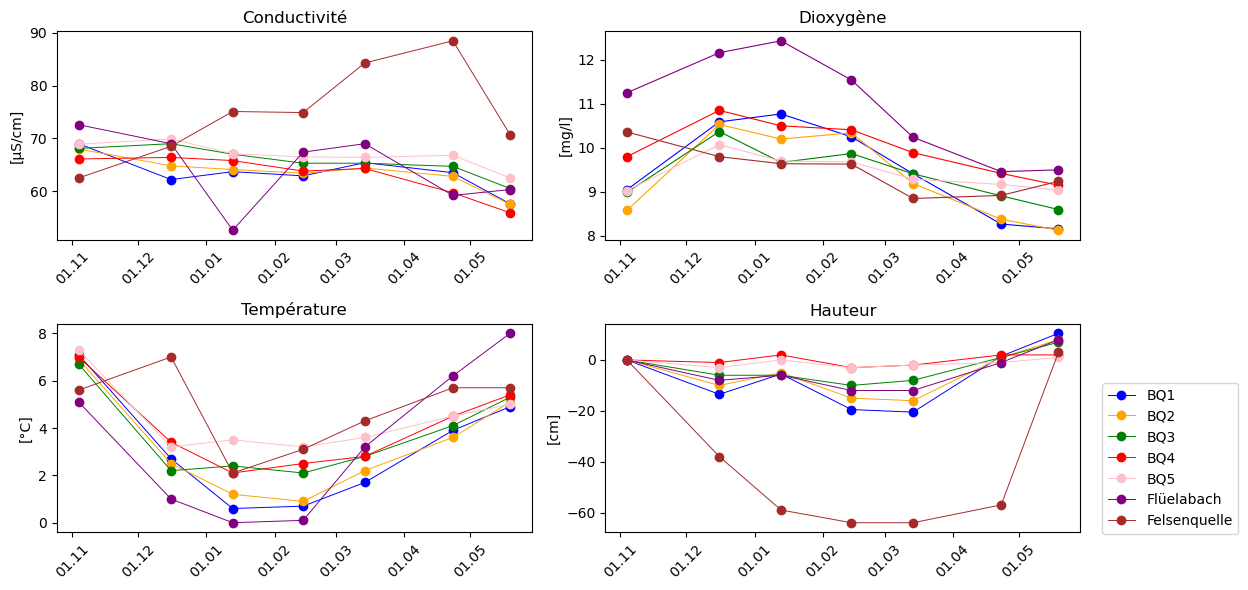

In [8]:
#Graphes

fig, axes = plt.subplots(2, 2, figsize=(11, 6))

#Conductivité
axes[0, 0].plot(dates_mesures, cond_bq1, marker='o',color='blue', label='BQ1', lw=0.7) 
axes[0, 0].plot(dates_mesures, cond_bq2, marker='o',color='orange', label='BQ2', lw=0.7) 
axes[0, 0].plot(dates_mesures, cond_bq3, marker='o',color='green', label='BQ3', lw=0.7) 
axes[0, 0].plot(dates_mesures, cond_bq4, marker='o',color='red', label='BQ4', lw=0.7) 
axes[0, 0].plot(dates_mesures, cond_bq5, marker='o',color='pink', label='BQ5', lw=0.7) 
axes[0, 0].plot(dates_mesures, cond_fb, marker='o',color='purple', label='Flüelabach', lw=0.7) 
axes[0, 0].plot(dates_mesures, cond_fq, marker='o',color='brown', label='Felsenquelle', lw=0.7) 
axes[0, 0].set_title("Conductivité")
axes[0, 0].set_ylabel("[μS/cm]")

#Température
#axes[0, 1].plot(dates_mesures, T_bq1, marker='+', lw=0.8) 
axes[1, 0].plot(dates_mesures, T_bq1, marker='o',color='blue', lw=0.7) 
axes[1, 0].plot(dates_mesures, T_bq2, marker='o',color='orange', lw=0.7) 
axes[1, 0].plot(dates_mesures, T_bq3, marker='o',color='green', lw=0.7) 
axes[1, 0].plot(dates_mesures, T_bq4, marker='o',color='red', lw=0.7) 
axes[1, 0].plot(dates_mesures, T_bq5, marker='o',color='pink', lw=0.7) 
axes[1, 0].plot(dates_mesures, T_fb, marker='o',color='purple', lw=0.7) 
axes[1, 0].plot(dates_mesures, T_fq, marker='o',color='brown', lw=0.7)   
axes[1, 0].set_title("Température")
axes[1, 0].set_ylabel("[°C]")

#Dioxygène
axes[0, 1].plot(dates_mesures, O2_bq1, marker='o',color='blue', lw=0.8) 
axes[0, 1].plot(dates_mesures, O2_bq2, marker='o',color='orange', lw=0.8) 
axes[0, 1].plot(dates_mesures, O2_bq3, marker='o',color='green', lw=0.8) 
axes[0, 1].plot(dates_mesures, O2_bq4, marker='o',color='red', lw=0.8) 
axes[0, 1].plot(dates_mesures, O2_bq5, marker='o',color='pink', lw=0.8) 
axes[0, 1].plot(dates_mesures, O2_fb, marker='o',color='purple', lw=0.8) 
axes[0, 1].plot(dates_mesures, O2_fq, marker='o',color='brown', lw=0.8)  
axes[0, 1].set_title("Dioxygène")
axes[0, 1].set_ylabel("[mg/l]")


#Hauteur d'eau 
axes[1, 1].plot(dates_mesures, h_bq1, marker='o',color='blue', lw=0.7) 
axes[1, 1].plot(dates_mesures, h_bq2, marker='o',color='orange', lw=0.7) 
axes[1, 1].plot(dates_mesures, h_bq3, marker='o',color='green', lw=0.7) 
axes[1, 1].plot(dates_mesures, h_bq4, marker='o',color='red', lw=0.7) 
axes[1, 1].plot(dates_mesures, h_bq5, marker='o',color='pink', lw=0.7) 
axes[1, 1].plot(dates_mesures, h_fb, marker='o',color='purple', lw=0.7) 
axes[1, 1].plot(dates_mesures, h_fq, marker='o',color='brown', lw=0.7) 
axes[1, 1].set_title("Hauteur")
axes[1, 1].set_ylabel("[cm]")


# Formatage de l'axe des dates
for ax in axes.flat:
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d.%m'))
    ax.tick_params(axis='x', rotation=45)

# Récupération des handles et labels depuis le premier axe
handles, labels = axes[0, 0].get_legend_handles_labels()

# Création de la légende globale
fig.legend(
    handles, labels,
    loc='center left',
    bbox_to_anchor=(1, 0.228),
    frameon=True
)

plt.tight_layout()
plt.savefig('evolution_CHYN7_tot.png', dpi=300, bbox_inches='tight')
#plt.subplots_adjust(right=0.8)  # Laisse de l'espace pour la légende
plt.show()

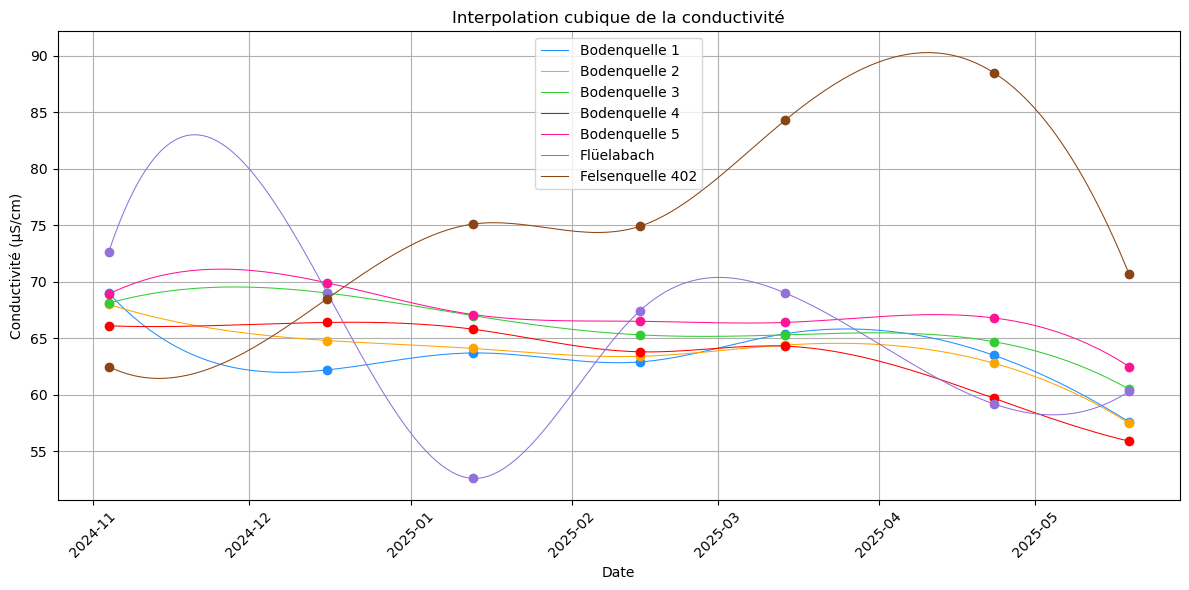

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# Dates des mesures
dates_mesures = np.array(['2024-11-04', '2024-12-16',
                          '2025-01-13', '2025-02-14', '2025-03-14', '2025-04-23', '2025-05-19'],
                         dtype='datetime64[D]')
dates_jours = (dates_mesures - dates_mesures[0]).astype(int)

# Dictionnaire des séries de conductivité
series = {
    'Bodenquelle 1': np.array(cond_bq1),
    'Bodenquelle 2': np.array(cond_bq2),
    'Bodenquelle 3': np.array(cond_bq3),
    'Bodenquelle 4': np.array(cond_bq4),
    'Bodenquelle 5': np.array(cond_bq5),
    'Flüelabach':    np.array(cond_fb),
    'Felsenquelle 402': np.array(cond_fq),
}

# Couleur personnalisée pour Bodenquelle 5
custom_colors = {'Bodenquelle 5': 'deeppink',
                 'Flüelabach': 'mediumpurple',
                 'Felsenquelle 402': 'saddlebrown',
                 'Bodenquelle 1': 'dodgerblue',
                 'Bodenquelle 2': 'orange',
                 'Bodenquelle 3': 'limegreen',
                 'Bodenquelle 4': 'r',}

# Tracé
plt.figure(figsize=(12, 6))
for i, (label, y_data) in enumerate(series.items()):
    y_data = np.array(y_data)
    valid_idx = ~np.isnan(y_data)
    x_valid = dates_jours[valid_idx]
    y_valid = y_data[valid_idx]

    # Ne rien tracer si < 4 points valides (interp1d cubic nécessite au moins 4 points)
    if len(x_valid) < 4:
        continue

    # Interpolation cubique
    interp_func = interp1d(x_valid, y_valid, kind='cubic')

    # Interpolation uniquement dans l’intervalle valide
    x_interp = np.arange(x_valid[0], x_valid[-1] + 1)
    y_interp = interp_func(x_interp)
    dates_interp = dates_mesures[0] + x_interp.astype('timedelta64[D]')

    # Couleur à utiliser
    color = custom_colors.get(label, None)

    # Tracé
    plt.plot(dates_interp, y_interp, '-', label=label, lw=0.75, color=color)
    plt.plot(dates_mesures[valid_idx], y_valid, 'o', color=color)

# Finitions
plt.xlabel("Date")
plt.ylabel("Conductivité (μS/cm)")
plt.title("Interpolation cubique de la conductivité")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('interpolation_cond_chyn7.png', dpi=300, bbox_inches='tight')
plt.show()


In [10]:
#Données Décembre-Janvier  
#données bodenquellen 
data_271_01 = pd.read_excel("SP_CHYN271_2025-01-13_09_10_09.xlsx")
data_272_01 = pd.read_excel("SP_CHYN272_2025-01-13_09_21_08.xlsx")
data_273_01 = pd.read_excel("SP_CHYN273_2025-01-13_09_32_07.xlsx")
data_274_01 = pd.read_excel("SP_CHYN274_2025-01-13_09_43_47.xlsx")

#données fluelabach
#rivière gelée 

#données felsenquelle hf
data_277_01 = pd.read_excel("SP_CHYN277_2025-01-13_08_38_34.xlsx")

#données BQ1 pression atmmopshérique et température 
data_261_01 = pd.read_excel("SP_CHYN261_2025-01-13_09_02_22.xlsx")

In [11]:
cond_271_01 = data_271_01["Unnamed: 6"][9:].values
mbar_271_01 = data_271_01["Unnamed: 3"][9:].values
T_271_01 = data_271_01["Unnamed: 4"][9:].values
temps_271_01 = data_271_01["2025-01-13 09:10:13.667000.1"][9:].values

cond_272_01 = data_272_01["Unnamed: 6"][9:].values
mbar_272_01 = data_272_01["Unnamed: 3"][9:].values
T_272_01 = data_272_01["Unnamed: 4"][9:].values
temps_272_01 = data_272_01["dates"][9:].values

cond_273_01 = data_273_01["Unnamed: 6"][9:].values
mbar_273_01 = data_273_01["Unnamed: 3"][9:].values
T_273_01 = data_273_01["Unnamed: 4"][9:].values
temps_273_01 = data_273_01["2025-01-13 09:32:12.567000.1"][9:].values

cond_274_01 = data_274_01["Unnamed: 6"][9:].values
mbar_274_01 = data_274_01["Unnamed: 3"][9:].values
T_274_01 = data_274_01["Unnamed: 4"][9:].values
temps_274_01 = data_274_01["2025-01-13 09:43:52.851000.1"][9:].values

# pas de cond276 du Fluelabach 

cond_277_01 = data_277_01["Unnamed: 6"][9:].values
mbar_277_01 = data_277_01["Unnamed: 3"][9:].values
T_277_01 = data_277_01["Unnamed: 4"][9:].values
temps_277_01 = data_277_01["2025-01-13 08:38:43.377000.1"][9:].values

mbar_261_01 = data_261_01["Unnamed: 3"][9:].values
T_261_01 = data_261_01["Unnamed: 4"][9:].values
temps_261_01 = data_261_01["2025-01-13 09:02:26.731000.1"][9:].values

In [12]:
#Données Janvier-Février  
#données bodenquellen 
data_271_02 = pd.read_excel("SP_CHYN271_2025-02-14_09_59_01.xlsx")
data_272_02 = pd.read_excel("SP_CHYN272_2025-02-14_10_13_31.xlsx")
data_273_02 = pd.read_excel("SP_CHYN273_2025-02-14_10_22_53.xlsx")
data_274_02 = pd.read_excel("SP_CHYN274_2025-02-14_10_32_16.xlsx")

#données fluelabach
data_276_02 = pd.read_excel("SP_CHYN276_2025-02-14_10_53_58.xlsx")

#données felsenquelle hf
data_277_02 = pd.read_excel("SP_CHYN277_2025-02-14_09_41_38.xlsx")

#données BQ1 pression atmmopshérique et température 
data_261_02 = pd.read_excel("SP_CHYN261_2025-02-14_10_04_27.xlsx")

In [13]:
cond_271_02 = data_271_02["Unnamed: 6"][9:].values
mbar_271_02 = data_271_02["Unnamed: 3"][9:].values
T_271_02 = data_271_02["Unnamed: 4"][9:].values
temps_271_02 = data_271_02["2025-02-14 09:59:05.170000.1"][9:].values

cond_272_02 = data_272_02["Unnamed: 6"][9:].values
mbar_272_02 = data_272_02["Unnamed: 3"][9:].values
T_272_02 = data_272_02["Unnamed: 4"][9:].values
temps_272_02 = data_272_02["2025-02-14 10:13:35.621000.1"][9:].values

cond_273_02 = data_273_02["Unnamed: 6"][9:].values
mbar_273_02 = data_273_02["Unnamed: 3"][9:].values
T_273_02 = data_273_02["Unnamed: 4"][9:].values
temps_273_02 = data_273_02["2025-02-14 10:22:57.041000.1"][9:].values

cond_274_02 = data_274_02["Unnamed: 6"][9:].values
mbar_274_02 = data_274_02["Unnamed: 3"][9:].values
T_274_02 = data_274_02["Unnamed: 4"][9:].values
temps_274_02 = data_274_02["2025-02-14 10:32:22.731000.1"][9:].values

cond_276_02 = data_276_02["Unnamed: 6"][9:].values
mbar_276_02 = data_276_02["Unnamed: 3"][9:].values
T_276_02 = data_276_02["Unnamed: 4"][9:].values
temps_276_02 = data_276_02["2025-02-14 10:54:03.577000.1"][9:].values

cond_277_02 = data_277_02["Unnamed: 6"][9:].values
mbar_277_02 = data_277_02["Unnamed: 3"][9:].values
T_277_02 = data_277_02["Unnamed: 4"][9:].values
temps_277_02 = data_277_02["2025-02-14 09:41:44.450000.1"][9:].values

mbar_261_02 = data_261_02["Unnamed: 3"][9:].values
T_261_02 = data_261_02["Unnamed: 4"][9:].values
temps_261_02 = data_261_02["2025-02-14 10:04:49.708000.1"][9:].values

In [14]:
#Données Février-Mars
#données bodenquellen 
data_271_03 = pd.read_excel("SP_CHYN271_2025-03-14_09_59_30.xlsx")
data_272_03 = pd.read_excel("SP_CHYN272_2025-03-14_10_10_12.xlsx")
data_273_03 = pd.read_excel("SP_CHYN273_2025-03-14_10_20_32.xlsx")
data_274_03 = pd.read_excel("SP_CHYN274_2025-03-14_10_30_46.xlsx")

#données fluelabach
data_276_03 = pd.read_excel("SP_CHYN276_2025-03-14_10_55_57.xlsx")

#données felsenquelle hf
data_277_03 = pd.read_excel("SP_CHYN277_2025-03-14_09_36_17.xlsx")

#données BQ1 pression atmmopshérique et température 
data_261_03 = pd.read_excel("SP_CHYN261_2025-03-14_09_53_20.xlsx")

In [15]:
cond_271_03 = data_271_03["Unnamed: 6"][9:].values
mbar_271_03 = data_271_03["Unnamed: 3"][9:].values
T_271_03 = data_271_03["Unnamed: 4"][9:].values
temps_271_03 = data_271_03["2025-03-14 09:59:42.584000.1"][9:].values

cond_272_03 = data_272_03["Unnamed: 6"][9:].values
mbar_272_03 = data_272_03["Unnamed: 3"][9:].values
T_272_03 = data_272_03["Unnamed: 4"][9:].values
temps_272_03 = data_272_03["2025-03-14 10:10:16.828000.1"][9:].values

cond_273_03 = data_273_03["Unnamed: 6"][9:].values
mbar_273_03 = data_273_03["Unnamed: 3"][9:].values
T_273_03 = data_273_03["Unnamed: 4"][9:].values
temps_273_03 = data_273_03["2025-03-14 10:20:41.249000.1"][9:].values

cond_274_03 = data_274_03["Unnamed: 6"][9:].values
mbar_274_03 = data_274_03["Unnamed: 3"][9:].values
T_274_03 = data_274_03["Unnamed: 4"][9:].values
temps_274_03 = data_274_03["2025-03-14 10:30:49.686000.1"][9:].values

cond_276_03 = data_276_03["Unnamed: 6"][9:].values
mbar_276_03 = data_276_03["Unnamed: 3"][9:].values
T_276_03 = data_276_03["Unnamed: 4"][9:].values
temps_276_03 = data_276_03["dates"][9:].values

cond_277_03 = data_277_03["Unnamed: 6"][9:].values
mbar_277_03 = data_277_03["Unnamed: 3"][9:].values
T_277_03 = data_277_03["Unnamed: 4"][9:].values
temps_277_03 = data_277_03["2025-03-14 09:36:24.764000.1"][9:].values

mbar_261_03 = data_261_03["Unnamed: 3"][9:].values
T_261_03 = data_261_03["Unnamed: 4"][9:].values
temps_261_03 = data_261_03["2025-03-14 09:53:27.942000.1"][9:].values

In [16]:
#Données Mars-Avril
#données bodenquellen 
data_271_04 = pd.read_excel("SP_CHYN271_2025-04-23_08_02_23.xlsx")
data_272_04 = pd.read_excel("SP_CHYN272_2025-04-23_08_13_38.xlsx")
data_273_04 = pd.read_excel("SP_CHYN273_2025-04-23_08_24_18.xlsx")
data_274_04 = pd.read_excel("SP_CHYN274_2025-04-23_08_36_41.xlsx")

#données fluelabach
data_276_04 = pd.read_excel("SP_CHYN276_2025-04-23_09_16_40.xlsx")

#données felsenquelle hf
data_277_04 = pd.read_excel("SP_CHYN277_2025-04-23_07_40_43.xlsx")

#données BQ1 pression atmmopshérique et température 
data_261_04 = pd.read_excel("SP_CHYN261_2025-04-23_07_55_28.xlsx")

In [17]:
cond_271_04 = data_271_04["Unnamed: 6"][9:].values
mbar_271_04 = data_271_04["Unnamed: 3"][9:].values
T_271_04 = data_271_04["Unnamed: 4"][9:].values
temps_271_04 = data_271_04["2025-04-23 08:02:30.878000.1"][9:].values

cond_272_04 = data_272_04["Unnamed: 6"][9:].values
mbar_272_04 = data_272_04["Unnamed: 3"][9:].values
T_272_04 = data_272_04["Unnamed: 4"][9:].values
temps_272_04 = data_272_04["2025-04-23 08:13:43.980000.1"][9:].values

cond_273_04 = data_273_04["Unnamed: 6"][9:].values
mbar_273_04 = data_273_04["Unnamed: 3"][9:].values
T_273_04 = data_273_04["Unnamed: 4"][9:].values
temps_273_04 = data_273_04["dates"][9:].values

cond_274_04 = data_274_04["Unnamed: 6"][9:].values
mbar_274_04 = data_274_04["Unnamed: 3"][9:].values
T_274_04 = data_274_04["Unnamed: 4"][9:].values
temps_274_04 = data_274_04["2025-04-23 08:36:46.661000.1"][9:].values

cond_276_04 = data_276_04["Unnamed: 6"][9:].values
mbar_276_04 = data_276_04["Unnamed: 3"][9:].values
T_276_04 = data_276_04["Unnamed: 4"][9:].values
temps_276_04 = data_276_04["dates"][9:].values

cond_277_04 = data_277_04["Unnamed: 6"][9:].values
mbar_277_04 = data_277_04["Unnamed: 3"][9:].values
T_277_04 = data_277_04["Unnamed: 4"][9:].values
temps_277_04 = data_277_04["2025-04-23 07:40:49.707000.1"][9:].values

mbar_261_04 = data_261_04["Unnamed: 3"][9:].values
T_261_04 = data_261_04["Unnamed: 4"][9:].values
temps_261_04 = data_261_04["2025-04-23 07:55:38.312000.1"][9:].values

In [18]:
#Données Avril-Mai
#données bodenquellen 
data_271_05 = pd.read_excel("SP_CHYN271_2025-05-19_08_56_51.xlsx")
data_272_05 = pd.read_excel("SP_CHYN272_2025-05-20_02_03_14.xlsx")
data_273_05 = pd.read_excel("SP_CHYN273_2025-05-19_09_21_32.xlsx")
data_274_05 = pd.read_excel("SP_CHYN274_2025-05-19_09_35_09.xlsx")

#données fluelabach
data_276_05 = pd.read_excel("SP_CHYN276_2025-05-19_09_54_05.xlsx")

#données felsenquelle hf
data_277_05 = pd.read_excel("SP_CHYN277_2025-05-19_08_38_46.xlsx")

#données BQ1 pression atmmopshérique et température 
data_261_05 = pd.read_excel("SP_CHYN261_2025-05-19_09_01_22.xlsx")

In [19]:
cond_271_05 = data_271_05["Unnamed: 6"][9:].values
mbar_271_05 = data_271_05["Unnamed: 3"][9:].values
T_271_05 = data_271_05["Unnamed: 4"][9:].values
temps_271_05 = data_271_05["2025-05-19 08:56:57.308000.1"][9:].values

cond_272_05 = data_272_05["Unnamed: 6"][9:].values
mbar_272_05 = data_272_05["Unnamed: 3"][9:].values
T_272_05 = data_272_05["Unnamed: 4"][9:].values
temps_272_05 = data_272_05["dates"][9:].values

cond_273_05 = data_273_05["Unnamed: 6"][9:].values
mbar_273_05 = data_273_05["Unnamed: 3"][9:].values
T_273_05 = data_273_05["Unnamed: 4"][9:].values
temps_273_05 = data_273_05["2025-05-19 09:21:38.910000.1"][9:].values

cond_274_05 = data_274_05["Unnamed: 6"][9:].values
mbar_274_05 = data_274_05["Unnamed: 3"][9:].values
T_274_05 = data_274_05["Unnamed: 4"][9:].values
temps_274_05 = data_274_05["2025-05-19 09:35:14.905000.1"][9:].values

cond_276_05 = data_276_05["Unnamed: 6"][9:].values
mbar_276_05 = data_276_05["Unnamed: 3"][9:].values
T_276_05 = data_276_05["Unnamed: 4"][9:].values
temps_276_05 = data_276_05["2025-05-19 09:54:10.235000.1"][9:].values

cond_277_05 = data_277_05["Unnamed: 6"][9:].values
mbar_277_05 = data_277_05["Unnamed: 3"][9:].values
T_277_05 = data_277_05["Unnamed: 4"][9:].values
temps_277_05 = data_277_05["2025-05-19 08:39:41.756000.1"][9:].values

mbar_261_05 = data_261_05["Unnamed: 3"][9:].values
T_261_05 = data_261_05["Unnamed: 4"][9:].values
temps_261_05 = data_261_05["2025-05-19 09:01:35.642000.1"][9:].values

In [20]:
#Mise en commun des jeux de données pour représenter les variations au cours de la période d'observation 

#Bodenquelle 1
tot_temps_271 = np.hstack((temps_271_12[2:], temps_271_01[:-1], temps_271_02[1:-1], temps_271_03, temps_271_04, temps_271_05))
tot_cond_271 = np.hstack((cond_271_12[2:], cond_271_01[:-1], cond_271_02[1:-1], cond_271_03, cond_271_04, cond_271_05))
tot_T_271 = np.hstack((T_271_12[2:], T_271_01[:-1], T_271_02[1:-1], T_271_03, T_271_04, T_271_05))
tot_mbar_271 = np.hstack((mbar_271_12[2:], mbar_271_01[:-1], mbar_271_02[1:-1], mbar_271_03, mbar_271_04, mbar_271_05))

#Bodenquelle 1 Pression atmosphérique et température de l'air 
tot_temps_261 = np.hstack((temps_261_12[4:-1], temps_261_01[2:-1], temps_261_02[1:-1], temps_261_03[1:], temps_261_04[4:], temps_261_05))
tot_T_261 = np.hstack((T_261_12[4:-1], T_261_01[2:-1], T_261_02[1:-1], T_261_03[1:], T_261_04[4:], T_261_05))
tot_mbar_261 = np.hstack((mbar_261_12[4:-1], mbar_261_01[2:-1], mbar_261_02[1:-1], mbar_261_03[1:], mbar_261_04[4:], mbar_261_05))

#Bodenquelle 2
tot_temps_272 = np.hstack((temps_272_12[5:], temps_272_01[:-1], temps_272_02[1:], temps_272_03, temps_272_04, temps_272_05))
tot_cond_272 = np.hstack((cond_272_12[5:], cond_272_01[:-1], cond_272_02[1:], cond_272_03, cond_272_04, cond_272_05))
tot_T_272 = np.hstack((T_272_12[5:], T_272_01[:-1], T_272_02[1:], T_272_03, T_272_04, T_272_05))
tot_mbar_272 = np.hstack((mbar_272_12[5:], mbar_272_01[:-1], mbar_272_02[1:], mbar_272_03, mbar_272_04, mbar_272_05))

#Bodenquelle 3
tot_temps_273 = np.hstack((temps_273_12[5:], temps_273_01, temps_273_02, temps_273_03, temps_273_04, temps_273_05))
tot_cond_273 = np.hstack((cond_273_12[5:], cond_273_01, cond_273_02, cond_273_03, cond_273_04, cond_273_05))
tot_T_273 = np.hstack((T_273_12[5:], T_273_01, T_273_02, T_273_03, T_273_04, T_273_05))
tot_mbar_273 = np.hstack((mbar_273_12[5:], mbar_273_01, mbar_273_02, mbar_273_03, mbar_273_04, mbar_273_05))

#Bodenquelle 4
tot_temps_274 = np.hstack((temps_274_12[6:], temps_274_01, temps_274_02, temps_274_03, temps_274_04[:-1], temps_274_05[:-1]))
tot_cond_274 = np.hstack((cond_274_12[6:], cond_274_01, cond_274_02, cond_274_03, cond_274_04[:-1], cond_274_05[:-1]))
tot_T_274 = np.hstack((T_274_12[6:], T_274_01, T_274_02, T_274_03, T_274_04[:-1], T_274_05[:-1]))
tot_mbar_274 = np.hstack((mbar_274_12[6:], mbar_274_01, mbar_274_02, mbar_274_03, mbar_274_04[:-1], mbar_274_05[:-1]))

#Flüelabach 
tot_temps_276 = np.hstack((temps_276_12[10:],  temps_276_02[:-1], temps_276_03, temps_276_04[4:], temps_276_05[1:]))
tot_cond_276 = np.hstack((cond_276_12[10:],  cond_276_02[:-1], cond_276_03, cond_276_04[4:], cond_276_05[1:]))
tot_T_276 = np.hstack((T_276_12[10:],  T_276_02[:-1], T_276_03, T_276_04[4:], T_276_05[1:]))
tot_mbar_276 = np.hstack((mbar_276_12[10:],  mbar_276_02[:-1], mbar_276_03, mbar_276_04[4:], mbar_276_05[1:]))

#Felsenquelle 402
tot_temps_277 = np.hstack((temps_277_12[13:], temps_277_01[1:], temps_277_02[1:], temps_277_03[2:], temps_277_04, temps_277_05))
tot_cond_277 = np.hstack((cond_277_12[13:], cond_277_01[1:], cond_277_02[1:], cond_277_03[2:], cond_277_04, cond_277_05))
tot_T_277 = np.hstack((T_277_12[13:], T_277_01[1:], T_277_02[1:], T_277_03[2:], T_277_04, T_277_05))
tot_mbar_277 = np.hstack((mbar_277_12[13:], mbar_277_01[1:], mbar_277_02[1:], mbar_277_03[2:], mbar_277_04, mbar_277_05))

In [21]:
data_precipitations = pd.read_excel("precipitations_neige_davos.xlsx")
data_precipitations.columns = ["Date", "pluie", "neige"]
data_precipitations["Date"] = pd.to_datetime(data_precipitations["Date"], format="%d.%m.%Y")

data_slf2 = pd.read_excel("SLF2.xlsx")


print(data_precipitations.head())
pluie_date = data_precipitations["Date"]
pluie_mm = data_precipitations["pluie"]

        Date  pluie  neige
0 2024-11-04    0.0    NaN
1 2024-11-05    0.0    NaN
2 2024-11-06    0.0    NaN
3 2024-11-07    0.0    NaN
4 2024-11-08    0.0    NaN


In [22]:
data_flu2 = pd.read_excel("FLU2.xlsx")

In [23]:
SLF2_date = pd.to_datetime(data_slf2["measure_date"])
FLU2_date = pd.to_datetime(data_flu2["measure_date"])

SLF2_date_og = pd.to_datetime(data_slf2["measure_date"])
SLF2_neige_og = data_slf2["HS"].values

# Définir les bornes de temps
start = pd.Timestamp("2024-11-04 08:00:00+00:00")
end = pd.Timestamp("2025-05-19 12:00:00+00:00")

# Filtrage SLF2
mask_slf = (SLF2_date >= start) & (SLF2_date <= end)
SLF2_date = SLF2_date[mask_slf]
SLF2_temp = data_slf2["TA_30MIN_MEAN"].values[mask_slf]
SLF2_neige = data_slf2["HS"].values[mask_slf]

# Filtrage FLU2
mask_flu = (FLU2_date >= start) & (FLU2_date <= end)
FLU2_date = FLU2_date[mask_flu]
FLU2_temp = data_flu2["TA_30MIN_MEAN"].values[mask_flu]
FLU2_neige = data_flu2["HS"].values[mask_flu]

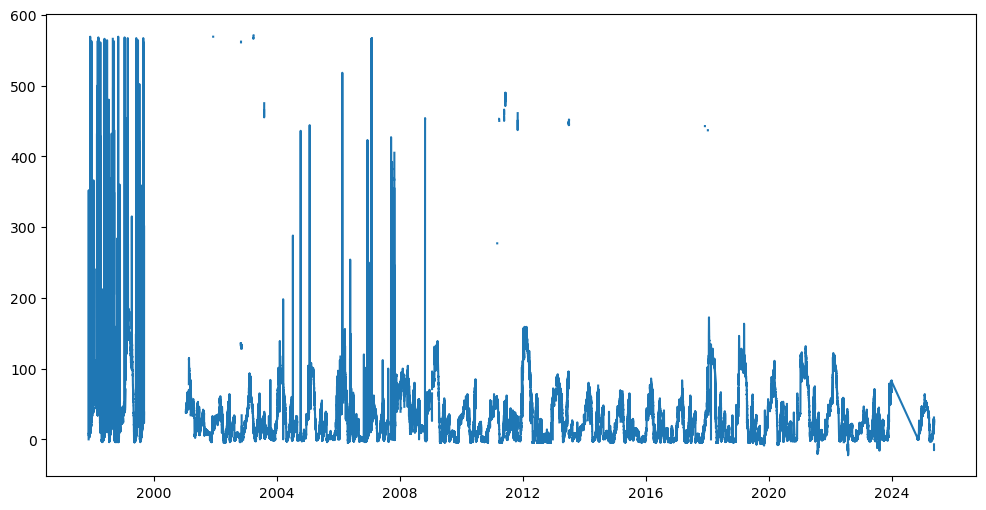

In [24]:
plt.figure(figsize=(12,6))
plt.plot(SLF2_date_og, SLF2_neige_og)

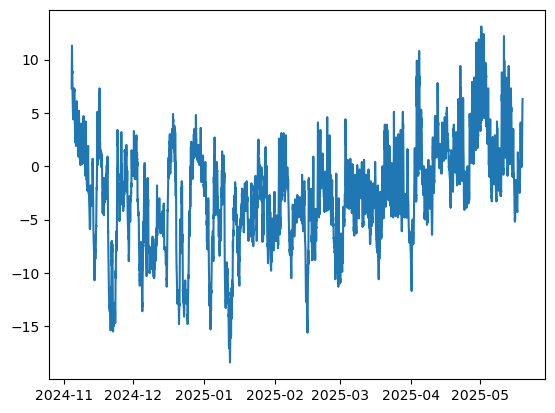

In [25]:
plt.plot(FLU2_date, FLU2_temp);

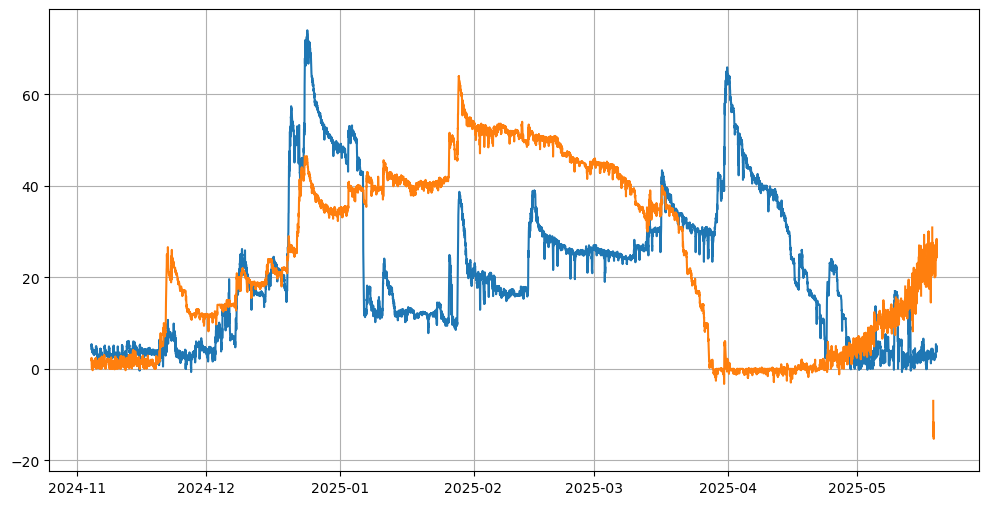

In [26]:
plt.figure(figsize=(12,6))
plt.plot(FLU2_date, FLU2_neige);
plt.plot(SLF2_date, SLF2_neige);
plt.grid()

In [27]:
# Créer un dictionnaire pour accéder rapidement aux pressions du 271 par date
dict_271 = {date: pressure for date, pressure in zip(tot_temps_271, tot_mbar_271)}
dict_272 = {date: pressure for date, pressure in zip(tot_temps_272, tot_mbar_272)}
dict_273 = {date: pressure for date, pressure in zip(tot_temps_273, tot_mbar_273)}
dict_274 = {date: pressure for date, pressure in zip(tot_temps_274, tot_mbar_274)}
dict_276 = {date: pressure for date, pressure in zip(tot_temps_276, tot_mbar_276)}
dict_277 = {date: pressure for date, pressure in zip(tot_temps_277, tot_mbar_277)}

tot_mbar2_271 = []
tot_temps_271_filtered = []

tot_mbar2_272 = []
tot_temps_272_filtered = []

tot_mbar2_273 = []
tot_temps_273_filtered = []

tot_mbar2_274 = []
tot_temps_274_filtered = []

tot_mbar2_276 = []
tot_temps_276_filtered = []

tot_mbar2_277 = []
tot_temps_277_filtered = []

# Parcourir les dates de 261 et soustraire si la date existe dans 271
#Bodenquelle 1
for date, pressure_261 in zip(tot_temps_261, tot_mbar_261):
    if date in dict_271:
        tot_mbar2_271.append(dict_271[date] - pressure_261)
        tot_temps_271_filtered.append(date)

#Bodenquelle 2
for date, pressure_261 in zip(tot_temps_261, tot_mbar_261):
    if date in dict_272:
        tot_mbar2_272.append(dict_272[date] - pressure_261)
        tot_temps_272_filtered.append(date)

#Bodenquelle 3
for date, pressure_261 in zip(tot_temps_261, tot_mbar_261):
    if date in dict_273:
        tot_mbar2_273.append(dict_273[date] - pressure_261)
        tot_temps_273_filtered.append(date)

#Bodenquelle 4
for date, pressure_261 in zip(tot_temps_261, tot_mbar_261):
    if date in dict_274:
        tot_mbar2_274.append(dict_274[date] - pressure_261)
        tot_temps_274_filtered.append(date)

#Flüelabach
for date, pressure_261 in zip(tot_temps_261, tot_mbar_261):
    if date in dict_276:
        tot_mbar2_276.append(dict_276[date] - pressure_261)
        tot_temps_276_filtered.append(date)

#Feslenquelle
for date, pressure_261 in zip(tot_temps_261, tot_mbar_261):
    if date in dict_277:
        tot_mbar2_277.append(dict_277[date] - pressure_261)
        tot_temps_277_filtered.append(date)
        
    
df_271 = pd.DataFrame({
    "Date": tot_temps_271_filtered,
    "Pression ajustée 271": tot_mbar2_271
})
df_271.to_csv("mbar_aj_271.csv", index=False) 

df_272 = pd.DataFrame({
    "Date": tot_temps_272_filtered,
    "Pression ajustée 272": tot_mbar2_272
})
df_272.to_csv("mbar_aj_272.csv", index=False) 

df_273 = pd.DataFrame({
    "Date": tot_temps_273_filtered,
    "Pression ajustée 273": tot_mbar2_273
})
df_273.to_csv("mbar_aj_273.csv", index=False) 

df_274 = pd.DataFrame({
    "Date": tot_temps_274_filtered,
    "Pression ajustée 274": tot_mbar2_274
})
df_274.to_csv("mbar_aj_274.csv", index=False) 

df_276 = pd.DataFrame({
    "Date": tot_temps_276_filtered,
    "Pression ajustée 276": tot_mbar2_276
})
df_276.to_csv("mbar_aj_276.csv", index=False) 

df_277 = pd.DataFrame({
    "Date": tot_temps_277_filtered,
    "Pression ajustée 277": tot_mbar2_277
})
df_277.to_csv("mbar_aj_277.csv", index=False) 

In [28]:
alt_271 = pd.read_excel("mbar_aj_271.xlsx")
alt_272 = pd.read_excel("mbar_aj_272.xlsx")
alt_273 = pd.read_excel("mbar_aj_273.xlsx")
alt_274 = pd.read_excel("mbar_aj_274.xlsx")
alt_276 = pd.read_excel("mbar_aj_276.xlsx")

In [29]:
nappe_271 = alt_271["Alt. Nappe"].values #pas plus bas que 1845.5
nappe_272 = alt_272["Alt. Nappe"].values #pas plus bas que 1844.0
nappe_273 = alt_273["Alt. Nappe"].values #1844.0 également
nappe_274 = alt_274["Alt. Nappe"].values #1843.5

# Nettoyage selon les seuils fixés
nappe_271_corr = np.where(nappe_271 >= 1845.5, nappe_271, np.nan)
nappe_272_corr = np.where(nappe_272 >= 1844.0, nappe_272, np.nan)
nappe_273_corr = np.where(nappe_273 >= 1844.0, nappe_273, np.nan)
nappe_274_corr = np.where(nappe_274 >= 1843.5, nappe_274, np.nan)

nappe_276 = alt_276["Alt. Nappe"].values #
nappe_276_corr = np.where(nappe_276 >= 1848.3, nappe_276, np.nan)

In [30]:
# Calcul de l'amplitude max - min
amplitude_nappe_271 = np.nanmax(nappe_271_corr) - np.nanmin(nappe_271_corr)
amplitude_nappe_272 = np.nanmax(nappe_272_corr) - np.nanmin(nappe_272_corr)
amplitude_nappe_273 = np.nanmax(nappe_273_corr) - np.nanmin(nappe_273_corr)
amplitude_nappe_274 = np.nanmax(nappe_274_corr) - np.nanmin(nappe_274_corr)
amplitude_nappe_276 = np.nanmax(nappe_276_corr) - np.nanmin(nappe_276_corr)

# Regrouper dans un tableau
amplitude_nappe_df = pd.DataFrame({
    "ID": ["BQ1", "BQ2", "BQ3", "BQ4", "FB"],
    "Amplitude_m": [amplitude_nappe_271, amplitude_nappe_272, amplitude_nappe_273, amplitude_nappe_274, amplitude_nappe_276]
})

# Sauvegarder en CSV
amplitude_nappe_df.to_csv("variations_nappe_eau.csv", index=False)

print(amplitude_nappe_df)

    ID  Amplitude_m
0  BQ1     0.468942
1  BQ2     0.388165
2  BQ3     0.279840
3  BQ4     0.170425
4   FB     0.336649


In [31]:
#Niveau dans les piezomètres 1-3

piezo_dates = np.array(['2024-11-04', '2024-12-16', '2025-04-23', '2025-05-19'], dtype='datetime64[D]')

piezo1 = np.array([1846.1 + 0.75 - 1.10, np.nan, 1846.1 + 0.75 - 1.08, 1846.1 + 0.75 - 1.0])
piezo2 = np.array([1845.6 + 0.47 - 0.77, np.nan, 1845.6 + 0.47 - 0.75, 1845.6 + 0.47 - 0.68])
piezo3 = np.array([1845.4 + 0.34 - 0.6, 1845.4 + 0.34 - 0.71, 1845.4 + 0.34 - 0.53, 1845.4 + 0.34 - 0.445])

In [32]:
print(len(nappe_271_corr))

18797


In [60]:
print(np.nanmean(nappe_274_corr))

1843.8799301664785


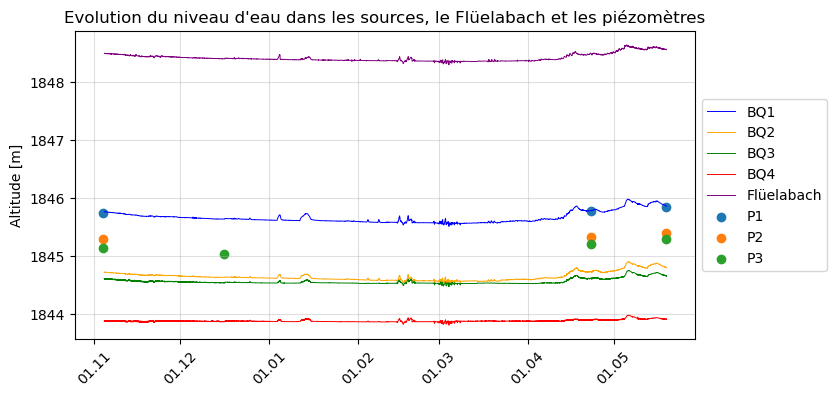

In [33]:
plt.figure(figsize=(8,4))

plt.plot(tot_temps_271_filtered, nappe_271_corr, color='blue', lw=0.7, label='BQ1')
plt.plot(tot_temps_272_filtered, nappe_272_corr, color='orange', lw=0.7, label='BQ2')
plt.plot(tot_temps_273_filtered, nappe_273_corr, color='green', lw=0.7, label='BQ3')
plt.plot(tot_temps_274_filtered, nappe_274_corr, color='red', lw=0.7, label='BQ4')
plt.plot(tot_temps_276_filtered, nappe_276_corr, color='purple', lw=0.7, label='Flüelabach')
plt.scatter(piezo_dates, piezo1, label='P1')
plt.scatter(piezo_dates, piezo2, label='P2')
plt.scatter(piezo_dates, piezo3, label='P3')

# Formater les dates sur l'axe x
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d.%m'))
plt.gca().tick_params(axis='x', rotation=45)
plt.gca().xaxis.set_tick_params(labelbottom=True)

plt.ylabel("Altitude [m]")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.grid(alpha=0.4)

plt.title('Evolution du niveau d\'eau dans les sources, le Flüelabach et les piézomètres')
#plt.savefig('evolution_niveau_eau_avecFB.png', dpi=300, bbox_inches='tight')
plt.show()

In [34]:
from datetime import datetime
from scipy.stats import linregress

def tracer_regr(ax, x_dates, y_vals, color, label, afficher_ligne=True):
    # Conversion des datetime en jours (incluant les heures et minutes)
    x_days = [(d - x_dates[0]).total_seconds() / 86400 for d in x_dates]
    
    # Régression linéaire
    slope, intercept, r_value, p_value, std_err = linregress(x_days, y_vals)
    
    # Tracé de la courbe mesurée
    ax.plot(x_dates, y_vals, color=color, lw=0.7)
    
    # Ligne de tendance si souhaitée
    if afficher_ligne:
        y_fit = [slope * x + intercept for x in x_days]
        ax.plot(x_dates, y_fit, linestyle='--', color=color, alpha=0.4)
    
    # Affichage de la pente
    ax.text(x_dates[5], max(y_vals), f'pente : {slope:.3f} m/j', fontsize=8, color=color)
    
    return slope  # Utile si tu veux stocker les pentes quelque part


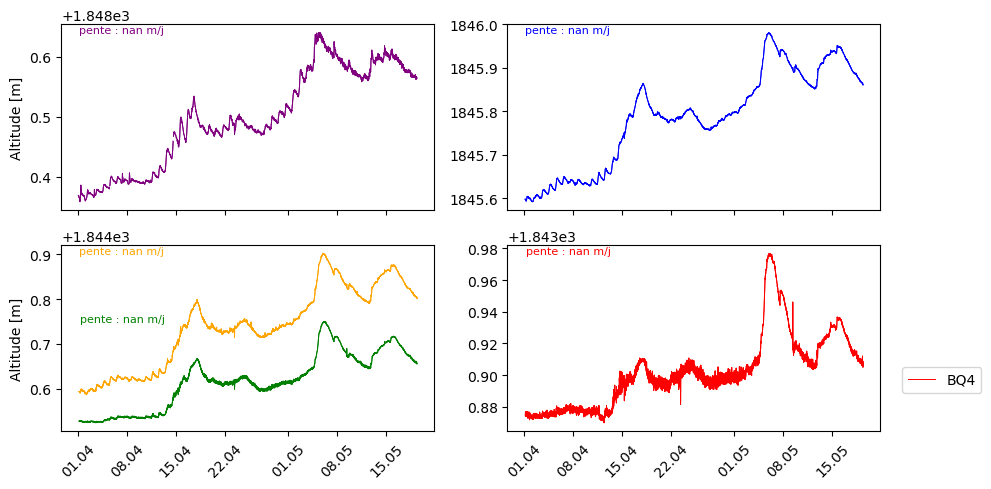

In [35]:
#limite avril 14170
from matplotlib.ticker import FormatStrFormatter

fig, axes = plt.subplots(2, 2, figsize=(9, 5), sharex=True)


axes[0, 0].plot(tot_temps_276_filtered[7072:], nappe_276_corr[7072:], color='purple', lw=0.7, label='Flüelabach')
axes[0, 0].set_ylabel('Altitude [m]')

axes[0, 1].plot(tot_temps_271_filtered[14170:], nappe_271_corr[14170:], color='blue', lw=0.7, label='BQ1')

axes[1, 0].plot(tot_temps_272_filtered[14170:], nappe_272_corr[14170:], color='orange', lw=0.7, label='BQ2') 
axes[1, 0].plot(tot_temps_273_filtered[14170:], nappe_273_corr[14170:], color='green', lw=0.7, label='BQ3')
axes[1, 0].set_ylabel('Altitude [m]')

axes[1, 1].plot(tot_temps_274_filtered[14170:], nappe_274_corr[14170:], color='red', lw=0.7, label='BQ4')

slope_BQ1 = tracer_regr(axes[0, 1], tot_temps_271_filtered[14170:], nappe_271_corr[14170:], 'blue', 'BQ1')
slope_BQ2 = tracer_regr(axes[1, 0], tot_temps_272_filtered[14170:], nappe_272_corr[14170:], 'orange', 'BQ2')
slope_BQ3 = tracer_regr(axes[1, 0], tot_temps_273_filtered[14170:], nappe_273_corr[14170:], 'green', 'BQ3')
slope_BQ4 = tracer_regr(axes[1, 1], tot_temps_274_filtered[14170:], nappe_274_corr[14170:], 'red', 'BQ4')
slope_riv = tracer_regr(axes[0, 0], tot_temps_276_filtered[7072:], nappe_276_corr[7072:], 'purple', 'Flüelabach')


for axes in axes.flat:
    axes.xaxis.set_major_formatter(mdates.DateFormatter('%d.%m'))
    axes.tick_params(axis='x', rotation=45)
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

# Récupération des handles et labels depuis le premier axe
handles, labels = axes.get_legend_handles_labels()

# Création de la légende globale
fig.legend(
    handles, labels,
    loc='center left',
    bbox_to_anchor=(1, 0.228),
    frameon=True
)


plt.tight_layout()
plt.show()

In [36]:
import numpy as np
import pandas as pd

# Gravité terrestre
g = 9.80665  # m/s²
rho = 1000   # kg/m³

# Fonction pour convertir pression corrigée (en mbar) → hauteur d'eau (en m)
def pression_to_hauteur(pression_mbar):
    pression_pa = np.array(pression_mbar) * 100  # Conversion en Pascal
    hauteur_m = pression_pa / (rho * g)
    return hauteur_m

# Conversion pour chaque sonde
h_271 = pression_to_hauteur(tot_mbar2_271)
h_272 = pression_to_hauteur(tot_mbar2_272)
h_273 = pression_to_hauteur(tot_mbar2_273)
h_274 = pression_to_hauteur(tot_mbar2_274)
h_276 = pression_to_hauteur(tot_mbar2_276)

# Calcul de l'amplitude max - min
amplitude_271 = np.max(h_271) - np.min(h_271)
amplitude_272 = np.max(h_272) - np.min(h_272)
amplitude_273 = np.max(h_273) - np.min(h_273)
amplitude_274 = np.max(h_274) - np.min(h_274)
amplitude_276 = np.max(h_276) - np.min(h_276)

# Regrouper dans un tableau
amplitude_df = pd.DataFrame({
    "ID": ["BQ1", "BQ2", "BQ3", "BQ4", "FB"],
    "Amplitude_m": [amplitude_271, amplitude_272, amplitude_273, amplitude_274, amplitude_276]
})

# Sauvegarder en CSV
amplitude_df.to_csv("variations_hauteur_eau.csv", index=False)

print(amplitude_df)


    ID  Amplitude_m
0  BQ1     0.468812
1  BQ2     0.388057
2  BQ3     0.279762
3  BQ4     0.170378
4   FB     0.336555


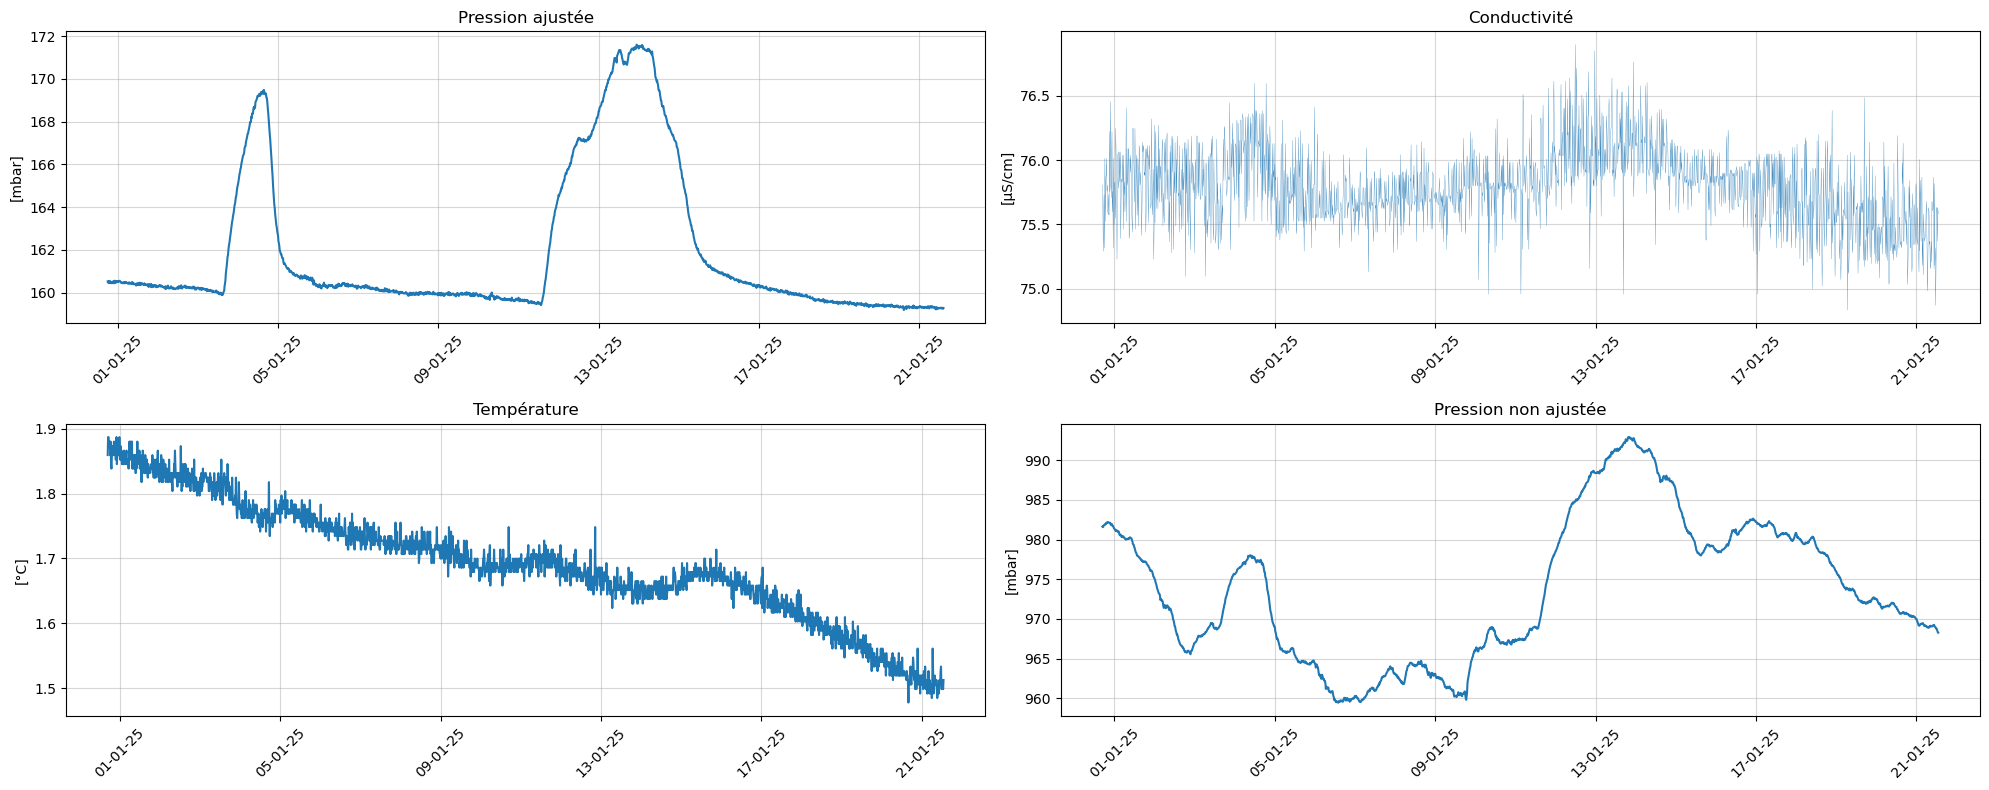

In [37]:
fig, ax = plt.subplots(2, 2, figsize=(20, 8))

ax[0,0].plot(tot_temps_271_filtered[5500:7500], tot_mbar2_271[5500:7500])
ax[0,0].set_title('Pression ajustée')
ax[0,0].set_ylabel('[mbar]')
ax[0,0].grid(alpha=0.5)

ax[0,1].plot(tot_temps_271[5500:7500], tot_cond_271[5500:7500], lw=0.2)
ax[0,1].set_title('Conductivité')
ax[0,1].set_ylabel('[μS/cm]')
ax[0,1].grid(alpha=0.5)

ax[1,0].plot(tot_temps_271[5500:7500], tot_T_271[5500:7500])
ax[1,0].set_title('Température')
ax[1,0].set_ylabel('[°C]')
ax[1,0].grid(alpha=0.5)

ax[1,1].plot(tot_temps_271[5500:7500], tot_mbar_271[5500:7500])
ax[1,1].set_title('Pression non ajustée')
ax[1,1].set_ylabel('[mbar]')
ax[1,1].grid(alpha=0.5)

for ax in ax.flat:
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%y'))
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


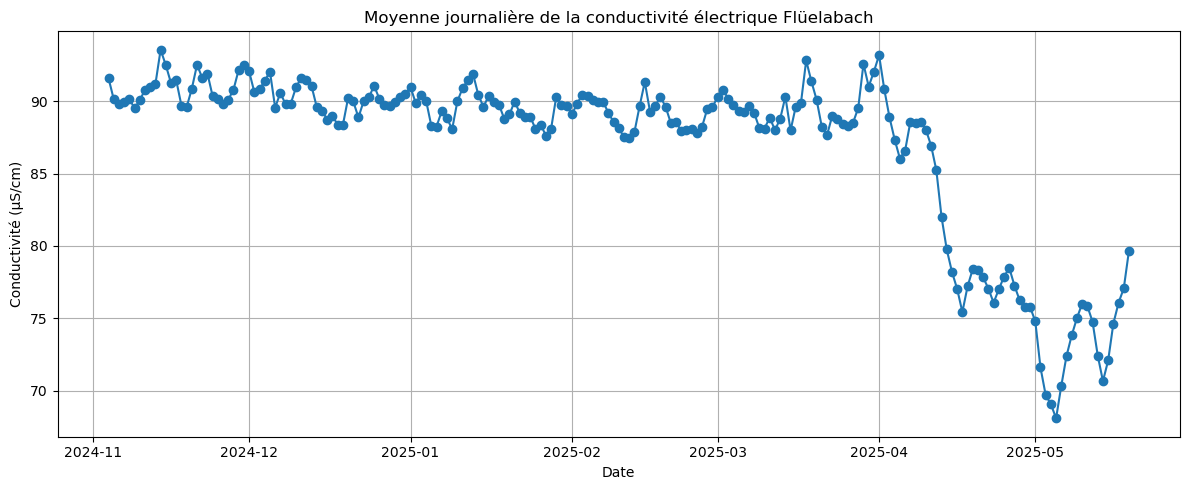

In [38]:
# Exemple de structure (tu dois déjà avoir ces deux vecteurs)
# tot_cond_276 : numpy array avec les valeurs de conductivité (µS/cm)
# tot_temps_276 : numpy array de mêmes dimensions, avec les timestamps (format datetime)

# Créer une série temporelle
df_cond = pd.DataFrame({
    'conductivite': tot_cond_276
}, index=pd.to_datetime(tot_temps_276))

# Supprimer les valeurs manquantes (si tu as enlevé certaines valeurs)
df_cond = df_cond.dropna()

# Calcul de la moyenne journalière
moyennes_journalières_cond = df_cond.resample('D').mean()

# Affichage
plt.figure(figsize=(12, 5))
plt.plot(moyennes_journalières_cond.index, moyennes_journalières_cond['conductivite'], marker='o', linestyle='-')
plt.title("Moyenne journalière de la conductivité électrique Flüelabach")
plt.xlabel("Date")
plt.ylabel("Conductivité (µS/cm)")
plt.grid(True)
plt.tight_layout()
plt.show()

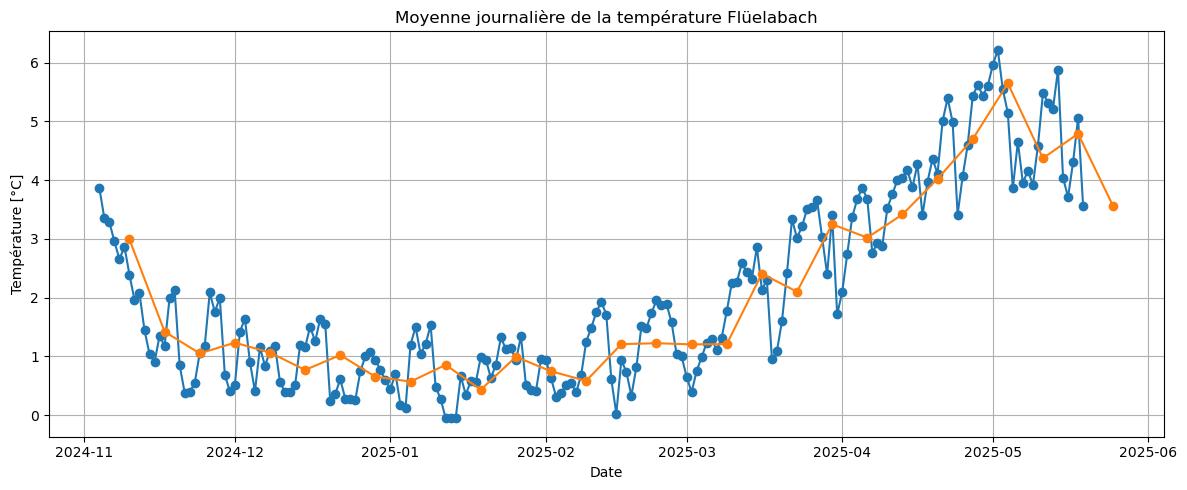

In [39]:
# Créer une série temporelle
df_T = pd.DataFrame({
    'temperature': tot_T_276
}, index=pd.to_datetime(tot_temps_276))

# Supprimer les valeurs manquantes (si tu as enlevé certaines valeurs)
df_T = df_T.dropna()

# Calcul de la moyenne journalière
moyennes_journalières_T = df_T.resample('D').mean()

#moyenne hebdo
moyenne_hebdo_T = df_T.resample('W').mean()


# Affichage
plt.figure(figsize=(12, 5))
plt.plot(moyennes_journalières_T.index, moyennes_journalières_T['temperature'], marker='o', linestyle='-')
plt.plot(moyenne_hebdo_T.index, moyenne_hebdo_T['temperature'], marker='o', linestyle='-')
plt.title("Moyenne journalière de la température Flüelabach")
plt.xlabel("Date")
plt.ylabel("Température [°C]")
plt.grid(True)
plt.tight_layout()
plt.show()

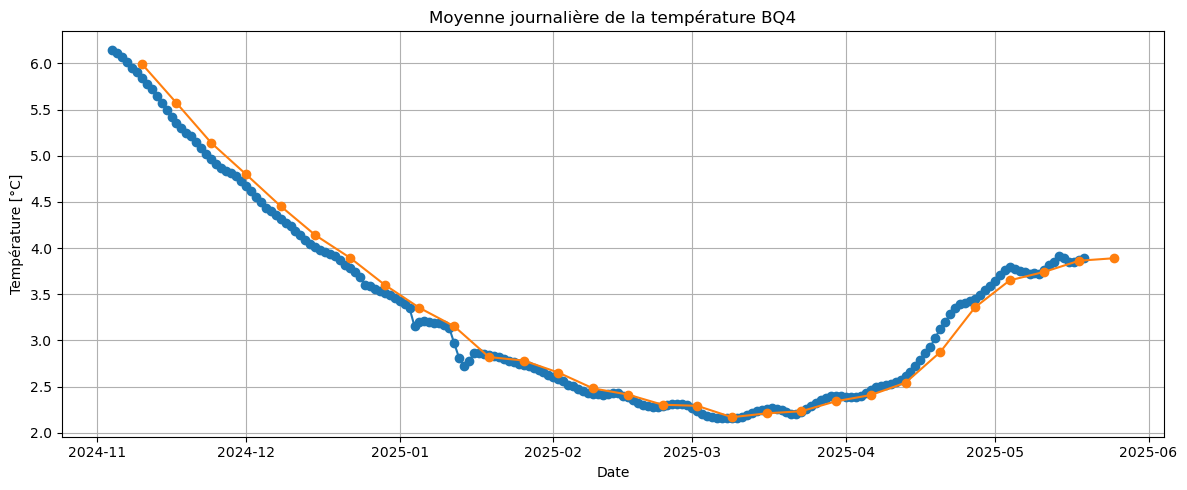

In [61]:
#Moyenne journalière BQ4
# Créer une série temporelle
df_T_274 = pd.DataFrame({
    'temperature': tot_T_274
}, index=pd.to_datetime(tot_temps_274))

# Supprimer les valeurs manquantes (si tu as enlevé certaines valeurs)
df_T_274 = df_T_274.dropna()

# Calcul de la moyenne journalière
moyennes_journalières_T_274 = df_T_274.resample('D').mean()

#moyenne hebdo
moyenne_hebdo_T_274 = df_T_274.resample('W').mean()


# Affichage
plt.figure(figsize=(12, 5))
plt.plot(moyennes_journalières_T_274.index, moyennes_journalières_T_274['temperature'], marker='o', linestyle='-')
plt.plot(moyenne_hebdo_T_274.index, moyenne_hebdo_T_274['temperature'], marker='o', linestyle='-')
plt.title("Moyenne journalière de la température BQ4")
plt.xlabel("Date")
plt.ylabel("Température [°C]")
plt.grid(True)
plt.tight_layout()
plt.show()

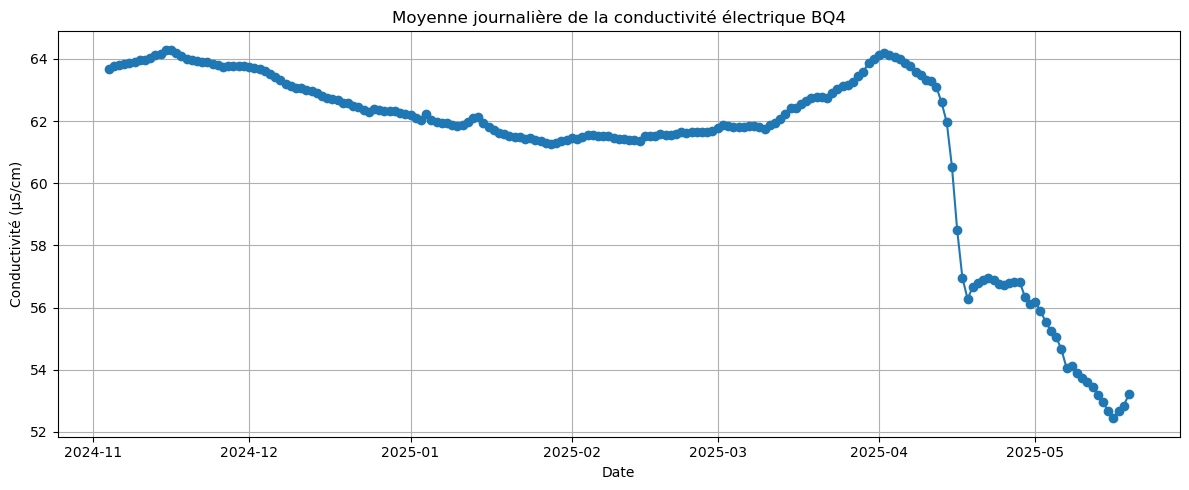

In [62]:
#Moyenne journalière cond BQ4
# Créer une série temporelle
df_cond_274 = pd.DataFrame({
    'conductivite': tot_cond_274
}, index=pd.to_datetime(tot_temps_274))

# Supprimer les valeurs manquantes (si tu as enlevé certaines valeurs)
df_cond_274 = df_cond_274.dropna()

# Calcul de la moyenne journalière
moyennes_journalières_cond_274 = df_cond_274.resample('D').mean()

# Affichage
plt.figure(figsize=(12, 5))
plt.plot(moyennes_journalières_cond_274.index, moyennes_journalières_cond_274['conductivite'], marker='o', linestyle='-')
plt.title("Moyenne journalière de la conductivité électrique BQ4")
plt.xlabel("Date")
plt.ylabel("Conductivité (µS/cm)")
plt.grid(True)
plt.tight_layout()
plt.show()

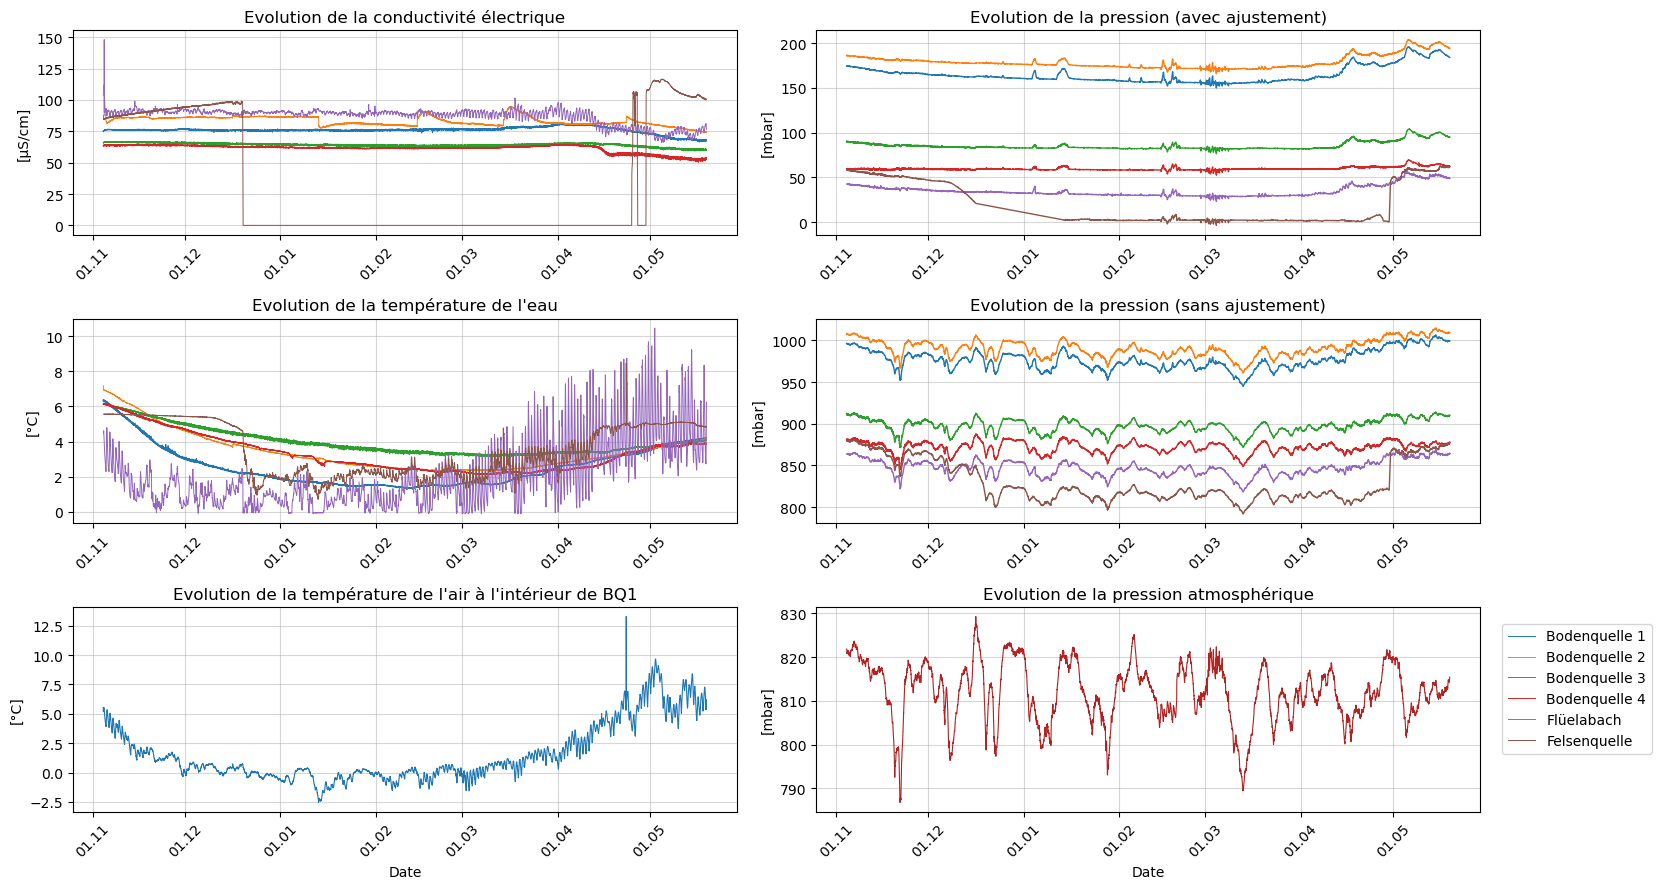

In [40]:
fig, axes = plt.subplots(3, 2, figsize=(15,9), sharex=True)

#Conductivité
axes[0,0].plot(tot_temps_271, tot_cond_271, lw=0.7, label='Bodenquelle 1')
axes[0,0].plot(tot_temps_272, tot_cond_272, lw=0.7, label='Bodenquelle 2')
axes[0,0].plot(tot_temps_273, tot_cond_273, lw=0.7, label='Bodenquelle 3')
axes[0,0].plot(tot_temps_274, tot_cond_274, lw=0.7, label='Bodenquelle 4')
axes[0,0].plot(tot_temps_276, tot_cond_276, lw=0.7, label='Flüelabach')
axes[0,0].plot(tot_temps_277, tot_cond_277, lw=0.7, label='Felsenquelle')
axes[0,0].grid(alpha=0.5)
axes[0,0].set_title("Evolution de la conductivité électrique")
axes[0,0].set_ylabel("[μS/cm]")

#Température 
axes[1,0].plot(tot_temps_271, tot_T_271, lw=0.7, label='Bodenquelle 1')
axes[1,0].plot(tot_temps_272, tot_T_272, lw=0.7, label='Bodenquelle 2')
axes[1,0].plot(tot_temps_273, tot_T_273, lw=0.7, label='Bodenquelle 3')
axes[1,0].plot(tot_temps_274, tot_T_274, lw=0.7, label='Bodenquelle 4')
axes[1,0].plot(tot_temps_276, tot_T_276, lw=0.7, label='Flüelabach')
axes[1,0].plot(tot_temps_277, tot_T_277, lw=0.7, label='Felsenquelle')
axes[1,0].grid(alpha=0.5)
axes[1,0].set_title("Evolution de la température de l'eau")
axes[1,0].set_ylabel("[°C]")

#Pression sans ajustement 
axes[1,1].plot(tot_temps_271, tot_mbar_271, lw=1, label='Bodenquelle 1')
axes[1,1].plot(tot_temps_272, tot_mbar_272, lw=1, label='Bodenquelle 2')
axes[1,1].plot(tot_temps_273, tot_mbar_273, lw=1, label='Bodenquelle 3')
axes[1,1].plot(tot_temps_274, tot_mbar_274, lw=1, label='Bodenquelle 4')
axes[1,1].plot(tot_temps_276, tot_mbar_276, lw=1, label='Flüelabach')
axes[1,1].plot(tot_temps_277, tot_mbar_277, lw=1, label='Felsenquelle')
axes[1,1].set_title("Evolution de la pression (sans ajustement)")
axes[1,1].grid(alpha=0.5)
axes[1,1].set_ylabel("[mbar]")

#Pression avec ajustement 
axes[0,1].plot(tot_temps_271_filtered, tot_mbar2_271, lw=1, label='Bodenquelle 1')
axes[0,1].plot(tot_temps_272_filtered, tot_mbar2_272, lw=1, label='Bodenquelle 2')
axes[0,1].plot(tot_temps_273_filtered, tot_mbar2_273, lw=1, label='Bodenquelle 3')
axes[0,1].plot(tot_temps_274_filtered, tot_mbar2_274, lw=1, label='Bodenquelle 4')
axes[0,1].plot(tot_temps_276_filtered, tot_mbar2_276, lw=1, label='Flüelabach')
axes[0,1].plot(tot_temps_277_filtered, tot_mbar2_277, lw=1, label='Felsenquelle')
axes[0,1].grid(alpha=0.5)
axes[0,1].set_title("Evolution de la pression (avec ajustement)")
axes[0,1].set_ylabel("[mbar]")

#Pression atmosphérique 
axes[2,1].plot(tot_temps_261, tot_mbar_261, lw=0.8, color='firebrick')
axes[2,1].set_title("Evolution de la pression atmosphérique")
axes[2,1].grid(alpha=0.5)
axes[2,1].set_ylabel("[mbar]")
axes[2,1].set_xlabel("Date")

#Température de l'air 
axes[2,0].plot(tot_temps_261, tot_T_261, lw=0.8)
axes[2,0].set_title("Evolution de la température de l'air à l'intérieur de BQ1")
axes[2,0].grid(alpha=0.5)
axes[2,0].set_xlabel("Date")
axes[2,0].set_ylabel("[°C]")

# Récupération des handles et labels depuis le premier axe
handles, labels = axes[0, 0].get_legend_handles_labels()

# Création de la légende globale
fig.legend(
    handles, labels,
    loc='center left',
    bbox_to_anchor=(1, 0.228),
    frameon=True
)


for ax in axes.flat:
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d.%m'))
    ax.tick_params(axis='x', rotation=45)
    ax.xaxis.set_tick_params(labelbottom=True)



plt.tight_layout()
plt.savefig('evolution_sondes_11-03.png', dpi=300, bbox_inches='tight')
plt.show()


In [41]:
print(len(tot_cond_277))

9395


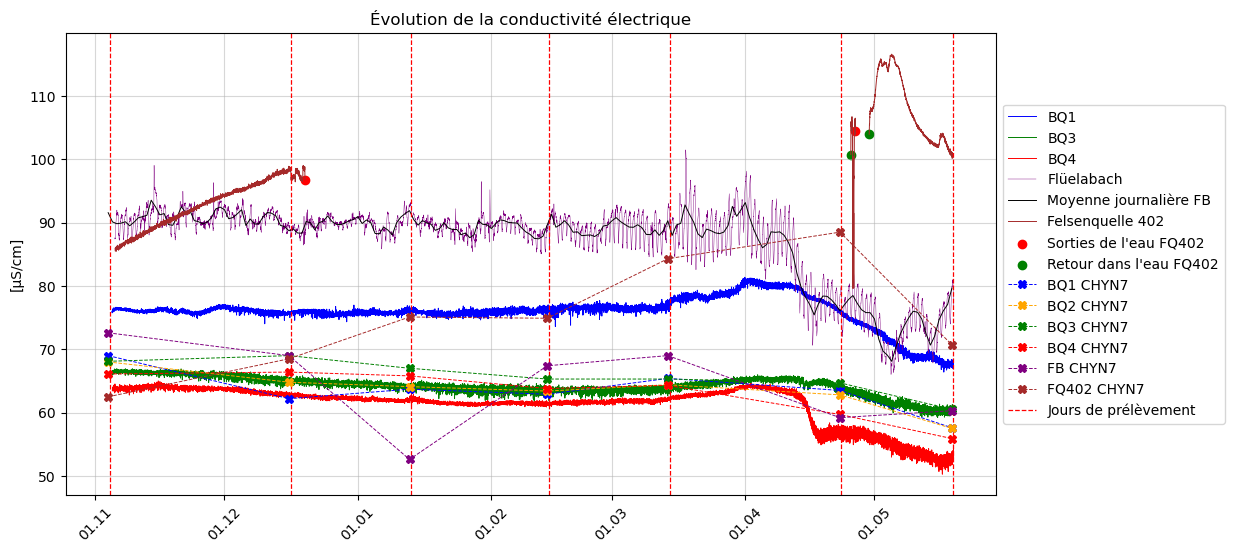

In [42]:
# Indices calculés des jours de prélèvements
indices = [0, 4039, 6723, 9793, 12480, 16304, 18799]

# Création de la figure et des axes
fig, ax1 = plt.subplots(figsize=(12, 6))
#ax2 = ax1.twinx()  # Deuxième axe pour les précipitations

# Courbes de conductivité
ax1.plot(tot_temps_271[50:], tot_cond_271[50:], color='blue', lw=0.7, label='BQ1')
#ax1.plot(tot_temps_272[60:], tot_cond_272[60:], color='orange', lw=0.7, label='BQ2')
ax1.plot(tot_temps_273[50:], tot_cond_273[50:], color='green', lw=0.7, label='BQ3')
ax1.plot(tot_temps_274[50:], tot_cond_274[50:], color='red', lw=0.7, label='BQ4')
ax1.plot(tot_temps_276[50:], tot_cond_276[50:], color='purple', lw=0.3, label='Flüelabach')
ax1.plot(moyennes_journalières_cond.index, moyennes_journalières_cond['conductivite'], color='black', lw=0.7, linestyle='-', label='Moyenne journalière FB')
ax1.plot(tot_temps_277[50:2167], tot_cond_277[50:2167], color='brown', lw=0.7, label='Felsenquelle 402')
ax1.plot(tot_temps_277[8250:8302], tot_cond_277[8250:8302], color='brown', lw=0.7)
ax1.plot(tot_temps_277[8455:], tot_cond_277[8455:], color='brown', lw=0.7)
ax1.scatter(tot_temps_277[2166], tot_cond_277[2166], marker='o', color='red', label='Sorties de l\'eau FQ402')
ax1.scatter(tot_temps_277[8301], tot_cond_277[8301], marker='o', color='red')
ax1.scatter(tot_temps_277[8250], tot_cond_277[8250], marker='o', color='green')
ax1.scatter(tot_temps_277[8455], tot_cond_277[8455], marker='o', color='green', label='Retour dans l\'eau FQ402')

# Points des prélèvements CHYN7
ax1.plot(dates_mesures, cond_bq1, '--', marker='X', color='blue', lw=0.7, label='BQ1 CHYN7', zorder=5)
ax1.plot(dates_mesures, cond_bq2, '--', marker='X', color='orange', lw=0.7, label='BQ2 CHYN7', zorder=5)
ax1.plot(dates_mesures, cond_bq3, '--', marker='X', color='green', lw=0.7, label='BQ3 CHYN7', zorder=5)
ax1.plot(dates_mesures, cond_bq4, '--', marker='X', color='red', lw=0.7, label='BQ4 CHYN7', zorder=5)
ax1.plot(dates_mesures, cond_fb, '--', marker='X', color='purple', lw=0.7, label='FB CHYN7', zorder=5)
ax1.plot(dates_mesures, cond_fq, '--', marker='X', color='brown', lw=0.7, label='FQ402 CHYN7', zorder=5)

# Lignes verticales pour les jours de prélèvement
for i, idx in enumerate(indices):
    if i == 0:
        ax1.axvline(x=tot_temps_271[idx], color='red', linestyle='--', lw=0.9, label='Jours de prélèvement')
    else:
        ax1.axvline(x=tot_temps_271[idx], color='red', linestyle='--', lw=0.9)

# Précipitations en arrière-plan
#ax2.bar(pluie_date, pluie_mm, width=2, color='skyblue', alpha=0.45, label='Précipitations (mm)', zorder=0)

# Mise en forme
ax1.set_title("Évolution de la conductivité électrique")
ax1.set_ylabel("[μS/cm]")
#ax1.set_xlabel("Dates")
#ax2.set_ylabel("Précipitations [mm/jour]")

# Légendes combinées
lines_1, labels_1 = ax1.get_legend_handles_labels()
#lines_2, labels_2 = ax2.get_legend_handles_labels()
#ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='center left', bbox_to_anchor=(1.06, 0.5))
ax1.legend(lines_1, labels_1, loc='center left', bbox_to_anchor=(1, 0.5))

ax1.grid(alpha=0.5)

# Formattage des dates sur l'axe x
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d.%m'))
ax1.tick_params(axis='x', rotation=45)

# Affichage ou sauvegarde
#plt.savefig('evolution_cond_tot_sans_precip.png', dpi=300, bbox_inches='tight')
plt.show()


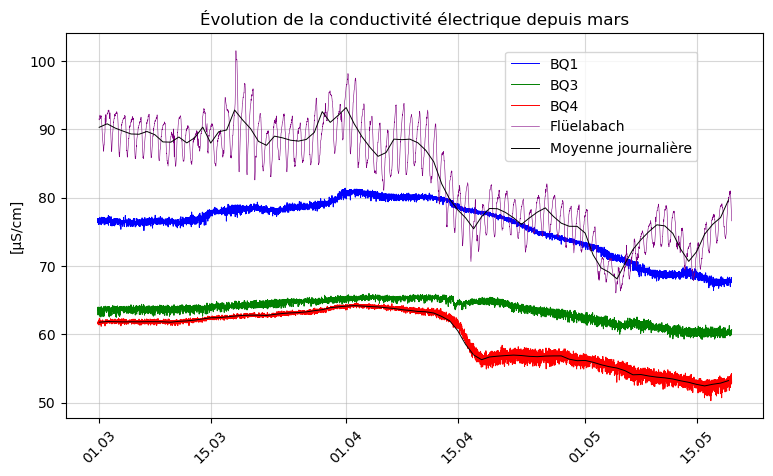

In [63]:
# Indices calculés des jours de prélèvements
indices = [12480, 16304, 18799]

# Création de la figure et des axes
fig, ax1 = plt.subplots(figsize=(9, 5))
#ax2 = ax1.twinx()  # Deuxième axe pour les précipitations

# Courbes de conductivité
ax1.plot(tot_temps_271[11170:], tot_cond_271[11170:], color='blue', lw=0.7, label='BQ1')
#ax1.plot(tot_temps_272[60:], tot_cond_272[60:], color='orange', lw=0.7, label='BQ2')
ax1.plot(tot_temps_273[11170:], tot_cond_273[11170:], color='green', lw=0.7, label='BQ3')
ax1.plot(tot_temps_274[11170:], tot_cond_274[11170:], color='red', lw=0.7, label='BQ4')
ax1.plot(tot_temps_276[5590:], tot_cond_276[5590:], color='purple', lw=0.4, label='Flüelabach')
ax1.plot(moyennes_journalières_cond.index[117:], moyennes_journalières_cond['conductivite'][117:], color='black', lw=0.7, linestyle='-', label='Moyenne journalière')
ax1.plot(moyennes_journalières_cond_274.index[117:], moyennes_journalières_cond_274['conductivite'][117:], color='black', lw=0.7, linestyle='-')
#ax2.plot(SLF2_date[5600:7100], SLF2_neige[5600:7100], color='dimgrey', lw=0.35, label='Hauteur de neige', zorder=0)

# Mise en forme
ax1.set_title("Évolution de la conductivité électrique depuis mars")
ax1.set_ylabel("[μS/cm]")
#ax1.set_xlabel("Dates")
#ax2.set_ylabel("Hauteur de neige [cm]")

# Légendes combinées
lines_1, labels_1 = ax1.get_legend_handles_labels()
#lines_2, labels_2 = ax2.get_legend_handles_labels()
#ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='center left', bbox_to_anchor=(0.62, 0.81))
ax1.legend(lines_1, labels_1, loc='center left', bbox_to_anchor=(0.62, 0.81))

ax1.grid(alpha=0.5)

# Formattage des dates sur l'axe x
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d.%m'))
ax1.tick_params(axis='x', rotation=45)

# Affichage ou sauvegarde
#plt.savefig('evolution_cond_depuis_mars_sans_hneige_9_5.png', dpi=300, bbox_inches='tight')
plt.show()

C:\Users\axela\AppData\Local\Temp\ipykernel_17336\2552951266.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax1.scatter(moyennes_journalières_cond.index[156], moyennes_journalières_cond['conductivite'][156], marker='o', color='skyblue', s=30)
C:\Users\axela\AppData\Local\Temp\ipykernel_17336\2552951266.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax1.scatter(moyennes_journalières_cond_274.index[159], moyennes_journalières_cond_274['conductivite'][159] , marker='o', color='skyblue', s=30)
C:\Users\axela\AppData\Local\Temp\ipykernel_17336\2552951266.py:8: FutureWarning: Series.__getitem__ treating keys as p

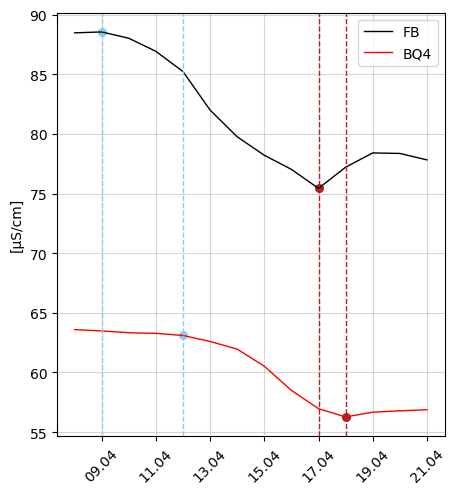

In [ ]:
fig, ax1 = plt.subplots(figsize=(5, 5.5))
ax1.plot(moyennes_journalières_cond.index[155:169], moyennes_journalières_cond['conductivite'][155:169], color='black', lw=1, linestyle='-', label='FB')
ax1.plot(moyennes_journalières_cond_274.index[155:169], moyennes_journalières_cond_274['conductivite'][155:169] , color='red', lw=1, linestyle='-', label='BQ4')

ax1.scatter(moyennes_journalières_cond.index[156], moyennes_journalières_cond['conductivite'][156], marker='o', color='skyblue', s=30)
ax1.scatter(moyennes_journalières_cond_274.index[159], moyennes_journalières_cond_274['conductivite'][159] , marker='o', color='skyblue', s=30)

ax1.scatter(moyennes_journalières_cond.index[164], moyennes_journalières_cond['conductivite'][164], marker='o', color='firebrick', s=30)
ax1.scatter(moyennes_journalières_cond_274.index[165], moyennes_journalières_cond_274['conductivite'][165] , marker='o', color='firebrick', s=30)

ax1.axvline(x=moyennes_journalières_cond_274.index[156], color='skyblue', linestyle='--', lw=1)
ax1.axvline(x=moyennes_journalières_cond_274.index[159], color='skyblue', linestyle='--', lw=1)

ax1.axvline(x=moyennes_journalières_cond_274.index[164], color='firebrick', linestyle='--', lw=1)
ax1.axvline(x=moyennes_journalières_cond_274.index[165], color='firebrick', linestyle='--', lw=1)

# Formattage des dates sur l'axe x
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d.%m'))
ax1.tick_params(axis='x', rotation=45)

ax1.set_ylabel("[μS/cm]")

plt.legend()
plt.grid(alpha=0.5)
#plt.savefig('reaction_cond_fb_vs_bq4.png', dpi=300, bbox_inches='tight')
plt.show()

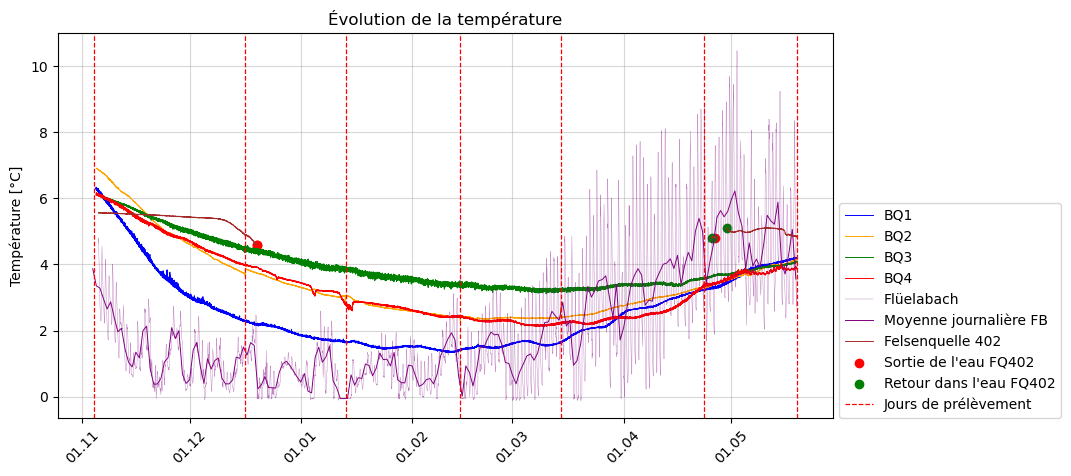

In [44]:
# Indices calculés des jours de prélèvements
indices = [0, 4039, 6723, 9793, 12480, 16304, 18799]

# Création de la figure et des axes
fig, ax1 = plt.subplots(figsize=(10, 5))
#ax2 = ax1.twinx()  # Deuxième axe pour les précipitations

# Précipitations en arrière-plan
#ax2.bar(pluie_date, pluie_mm, width=2, color='skyblue', alpha=0.4, label='Précipitations (mm)', zorder=0)

# Courbes de température
ax1.plot(tot_temps_271[50:], tot_T_271[50:], color='blue', lw=0.7, label='BQ1')
ax1.plot(tot_temps_272[60:], tot_T_272[60:], color='orange', lw=0.7, label='BQ2')
ax1.plot(tot_temps_273[50:], tot_T_273[50:], color='green', lw=0.7, label='BQ3')
ax1.plot(tot_temps_274[50:], tot_T_274[50:], color='red', lw=0.7, label='BQ4')
ax1.plot(tot_temps_276[50:], tot_T_276[50:], color='purple', lw=0.3, alpha=0.5, label='Flüelabach') 
ax1.plot(moyennes_journalières_T.index, moyennes_journalières_T['temperature'], color='purple', lw=0.7, linestyle='-', label='Moyenne journalière FB')
#ax1.plot(moyenne_hebdo_T.index, moyenne_hebdo_T['temperature'], color='black', lw=0.7, label='Moyenne hebdomadaire FB')
ax1.plot(tot_temps_277[50:2167], tot_T_277[50:2167], lw=0.7, color='brown', label='Felsenquelle 402')
ax1.scatter(tot_temps_277[2166], tot_T_277[2166], marker='o', color='red', label='Sortie de l\'eau FQ402')
ax1.plot(tot_temps_277[8250:8302], tot_T_277[8250:8302], color='brown', lw=0.7)
ax1.plot(tot_temps_277[8455:], tot_T_277[8455:], color='brown', lw=0.7)
ax1.scatter(tot_temps_277[2166], tot_T_277[2166], marker='o', color='red')
ax1.scatter(tot_temps_277[8301], tot_T_277[8301], marker='o', color='red')
ax1.scatter(tot_temps_277[8250], tot_T_277[8250], marker='o', color='green')
ax1.scatter(tot_temps_277[8455], tot_T_277[8455], marker='o', color='green', label='Retour dans l\'eau FQ402')

# Mesures ponctuelles CHYN7
#ax1.plot(dates_mesures[2:], T_bq1[2:], '--', marker='X', color='blue', markersize=8, lw=0.7, label='BQ1 CHYN7', zorder=5)
#ax1.plot(dates_mesures[2:], T_bq2[2:], '--', marker='X', color='orange', markersize=8, lw=0.7, label='BQ2 CHYN7', zorder=5)
#ax1.plot(dates_mesures[2:], T_bq3[2:], '--', marker='X', color='green', markersize=8, lw=0.7, label='BQ3 CHYN7', zorder=5)
#ax1.plot(dates_mesures[2:], T_bq4[2:], '--', marker='X', color='red', markersize=8, lw=0.7, label='BQ4 CHYN7', zorder=5)
#ax1.plot(dates_mesures[2:], T_fb[2:], '--', marker='X', color='purple', markersize=8, lw=0.7, label='FB CHYN7', zorder=5)
#ax1.plot(dates_mesures[2:], T_fq[2:], '--', marker='X', color='brown', markersize=8, lw=0.7, label='FQ402 CHYN7', zorder=5)

# Lignes verticales des jours de prélèvements
for i, idx in enumerate(indices):
    if i == 0:
        ax1.axvline(x=tot_temps_271[idx], color='red', linestyle='--', lw=0.9, label='Jours de prélèvement')
    else:
        ax1.axvline(x=tot_temps_271[idx], color='red', linestyle='--', lw=0.9)

# Mise en forme
ax1.set_title("Évolution de la température")
ax1.set_ylabel("Température [°C]")
#ax1.set_xlabel("Dates")
#ax2.set_ylabel("Précipitations [mm/jour]")

# Légende combinée
lines_1, labels_1 = ax1.get_legend_handles_labels()
#lines_2, labels_2 = ax2.get_legend_handles_labels()
#ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='center left', bbox_to_anchor=(1, 0.28))
ax1.legend(lines_1, labels_1, loc='center left', bbox_to_anchor=(1, 0.28))

ax1.grid(alpha=0.5)

# Formattage des dates sur l'axe x
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d.%m'))
ax1.tick_params(axis='x', rotation=45)

# Affichage ou sauvegarde
#plt.savefig('evolution_temp_tot_sans_precip_ave_fb.png', dpi=300, bbox_inches='tight')
plt.show()


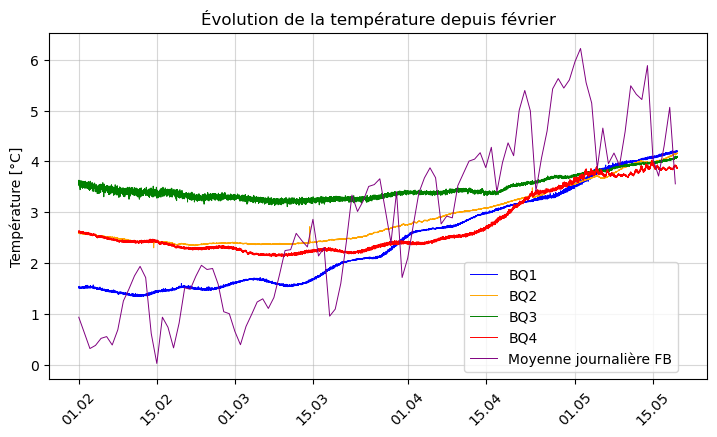

In [45]:
# Indices calculés des jours de prélèvements
#indices = [0, 4039, 6723, 9793, 12480, 16304, 18799]

# Création de la figure et des axes
fig, ax1 = plt.subplots(figsize=(8.5, 4.5))
#ax2 = ax1.twinx()  # Deuxième axe pour les précipitations

# Précipitations en arrière-plan
#ax2.bar(pluie_date, pluie_mm, width=2, color='skyblue', alpha=0.4, label='Précipitations (mm)', zorder=0)

# Courbes de température
ax1.plot(tot_temps_271[8500:], tot_T_271[8500:], color='blue', lw=0.7, label='BQ1')
ax1.plot(tot_temps_272[8500:], tot_T_272[8500:], color='orange', lw=0.7, label='BQ2')
ax1.plot(tot_temps_273[8500:], tot_T_273[8500:], color='green', lw=0.7, label='BQ3')
ax1.plot(tot_temps_274[8500:], tot_T_274[8500:], color='red', lw=0.7, label='BQ4')
#ax1.plot(tot_temps_276[50:], tot_T_276[50:], color='purple', lw=0.2, label='Flüelabach') 
ax1.plot(moyennes_journalières_T.index[89:], moyennes_journalières_T['temperature'][89:], color='purple', lw=0.7, linestyle='-', label='Moyenne journalière FB')



# Mise en forme
ax1.set_title("Évolution de la température depuis février")
ax1.set_ylabel("Température [°C]")

# Légende combinée
lines_1, labels_1 = ax1.get_legend_handles_labels()
ax1.legend(lines_1, labels_1, loc='center left', bbox_to_anchor=(0.62, 0.18))

ax1.grid(alpha=0.5)

# Formattage des dates sur l'axe x
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d.%m'))
ax1.tick_params(axis='x', rotation=45)

# Affichage ou sauvegarde
#plt.savefig('evolution_temp_fev_sans_precip.png', dpi=300, bbox_inches='tight')
plt.show()

In [46]:
# 1.1 Interpolation sur un index commun
start_date = max(tot_temps_271[8500], moyennes_journalières_T.index[89])
end_date = min(tot_temps_271[-1], moyennes_journalières_T.index[-1])

common_index = pd.date_range(start=start_date, end=end_date, freq='D')  # fréquence quotidienne

# 1.2 Interpolations linéaires
bq1_series = pd.Series(tot_T_271[8500:], index=tot_temps_271[8500:])
bq1_interp = bq1_series.reindex(common_index).interpolate()

fb_series = moyennes_journalières_T['temperature'][89:]
fb_interp = fb_series.reindex(common_index).interpolate()

# 1.3 Corrélation croisée
corr_bq1_fb = correlate(bq1_interp - bq1_interp.mean(), fb_interp - fb_interp.mean(), mode='full')
lags = np.arange(-len(common_index) + 1, len(common_index))
lag_bq1 = lags[np.argmax(corr_bq1_fb)]

print(f"Décalage optimal Flüelabach vs BQ1 : {lag_bq1} jours")



C:\Users\axela\AppData\Local\Temp\ipykernel_17336\116137685.py:9: FutureWarning: Series.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  bq1_interp = bq1_series.reindex(common_index).interpolate()
C:\Users\axela\AppData\Local\Temp\ipykernel_17336\116137685.py:12: FutureWarning: Series.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  fb_interp = fb_series.reindex(common_index).interpolate()


NameError: name 'correlate' is not defined

In [ ]:
# 1.1 Index temporel commun
start_date = max(tot_temps_271[8500], moyennes_journalières_T.index[89])
end_date = min(tot_temps_271[-1], moyennes_journalières_T.index[-1])
common_index = pd.date_range(start=start_date, end=end_date, freq='30min')  # à adapter si résolution différente

# 1.2 Interpolation
bq1_series = pd.Series(tot_T_271[8500:], index=tot_temps_271[8500:])
bq1_interp = bq1_series.reindex(common_index).interpolate()

fb_series = moyennes_journalières_T['temperature'][89:]
fb_interp = fb_series.reindex(common_index).interpolate()

# 1.3 Corrélation croisée
corr_bq1_fb = correlate(bq1_interp - bq1_interp.mean(), fb_interp - fb_interp.mean(), mode='full')
lags = np.arange(-len(common_index)+1, len(common_index))

# 1.4 Calcul du pas de temps en heures
delta_t = (common_index[1] - common_index[0]).total_seconds() / 3600  # ex : 0.5 pour 30 min
lag_bq1_hours = lags[np.argmax(corr_bq1_fb)] * delta_t

print(f"Décalage optimal Flüelabach vs BQ1 : {lag_bq1_hours:.1f} heures")


C:\Users\axela\AppData\Local\Temp\ipykernel_4884\2380362386.py:8: FutureWarning: Series.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  bq1_interp = bq1_series.reindex(common_index).interpolate()
C:\Users\axela\AppData\Local\Temp\ipykernel_4884\2380362386.py:11: FutureWarning: Series.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  fb_interp = fb_series.reindex(common_index).interpolate()


NameError: name 'correlate' is not defined

In [ ]:
# 2.1 Définir les bornes temporelles communes
start_date_bq4 = max(tot_temps_274[8500], moyennes_journalières_T.index[89])
end_date_bq4 = min(tot_temps_274[-1], moyennes_journalières_T.index[-1])

common_index_bq4 = pd.date_range(start=start_date_bq4, end=end_date_bq4, freq='D')

# 2.2 Interpolations linéaires
bq4_series = pd.Series(tot_T_274[8500:], index=tot_temps_274[8500:])
bq4_interp = bq4_series.reindex(common_index_bq4).interpolate()

fb_series_bq4 = moyennes_journalières_T['temperature'][89:]
fb_interp_bq4 = fb_series_bq4.reindex(common_index_bq4).interpolate()

# 2.3 Corrélation croisée
corr_bq4_fb = correlate(bq4_interp - bq4_interp.mean(), fb_interp_bq4 - fb_interp_bq4.mean(), mode='full')
lags_bq4 = np.arange(-len(common_index_bq4) + 1, len(common_index_bq4))
lag_bq4 = lags_bq4[np.argmax(corr_bq4_fb)]

print(f"Décalage optimal Flüelabach vs BQ4 : {lag_bq4} jours")


C:\Users\axela\AppData\Local\Temp\ipykernel_4884\976298776.py:9: FutureWarning: Series.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  bq4_interp = bq4_series.reindex(common_index_bq4).interpolate()
C:\Users\axela\AppData\Local\Temp\ipykernel_4884\976298776.py:12: FutureWarning: Series.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  fb_interp_bq4 = fb_series_bq4.reindex(common_index_bq4).interpolate()


NameError: name 'correlate' is not defined

In [ ]:
# 2.1 Index temporel commun
start_date_bq4 = max(tot_temps_274[8500], moyennes_journalières_T.index[89])
end_date_bq4 = min(tot_temps_274[-1], moyennes_journalières_T.index[-1])
common_index_bq4 = pd.date_range(start=start_date_bq4, end=end_date_bq4, freq='30min')  # adapte si besoin

# 2.2 Interpolation
bq4_series = pd.Series(tot_T_274[8500:], index=tot_temps_274[8500:])
bq4_interp = bq4_series.reindex(common_index_bq4).interpolate()

fb_series_bq4 = moyennes_journalières_T['temperature'][89:]
fb_interp_bq4 = fb_series_bq4.reindex(common_index_bq4).interpolate()

# 2.3 Corrélation croisée
corr_bq4_fb = correlate(bq4_interp - bq4_interp.mean(), fb_interp_bq4 - fb_interp_bq4.mean(), mode='full')
lags_bq4 = np.arange(-len(common_index_bq4)+1, len(common_index_bq4))

# 2.4 Conversion en heures
delta_t_bq4 = (common_index_bq4[1] - common_index_bq4[0]).total_seconds() / 3600
lag_bq4_hours = lags_bq4[np.argmax(corr_bq4_fb)] * delta_t_bq4

print(f"Décalage optimal Flüelabach vs BQ4 : {lag_bq4_hours:.1f} heures")


C:\Users\axela\AppData\Local\Temp\ipykernel_8568\873794352.py:8: FutureWarning: Series.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  bq4_interp = bq4_series.reindex(common_index_bq4).interpolate()
C:\Users\axela\AppData\Local\Temp\ipykernel_8568\873794352.py:11: FutureWarning: Series.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  fb_interp_bq4 = fb_series_bq4.reindex(common_index_bq4).interpolate()


Décalage optimal Flüelabach vs BQ4 : -2568.0 heures


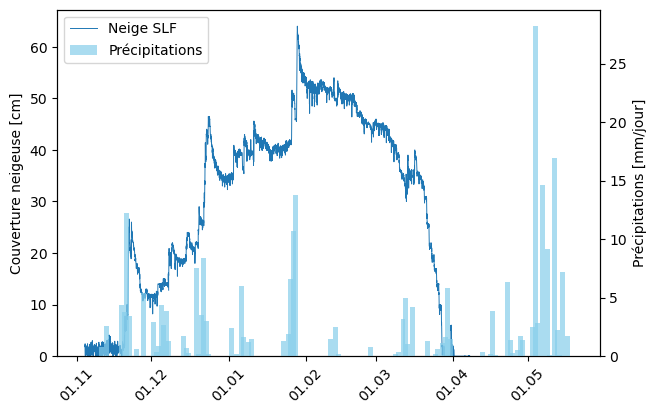

In [47]:
SLF2_neige = np.where(SLF2_neige < 0, 0, SLF2_neige)

# Création de la figure et des axes
fig, ax1 = plt.subplots(figsize=(7, 4.5))
ax2 = ax1.twinx()  # Deuxième axe pour les précipitations

# Précipitations en arrière-plan
ax2.bar(pluie_date, pluie_mm, width=2, color='skyblue', alpha=0.7, label='Précipitations', zorder=0)
ax1.plot(SLF2_date[:-2000], SLF2_neige[:-2000], lw=0.7, label='Neige SLF')

ax1.set_ylabel("Couverture neigeuse [cm]")
ax2.set_ylabel("Précipitations [mm/jour]")

ax1.set_ylim(bottom=0)  # Neige à partir de 0

# ... après plot et bar :
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')


#ax1.grid(alpha=0.5)

# Formattage des dates sur l'axe x
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d.%m'))
ax1.tick_params(axis='x', rotation=45)


# Affichage ou sauvegarde
#plt.savefig('evolution_precipitations_davos.png', dpi=300, bbox_inches='tight')
plt.show()


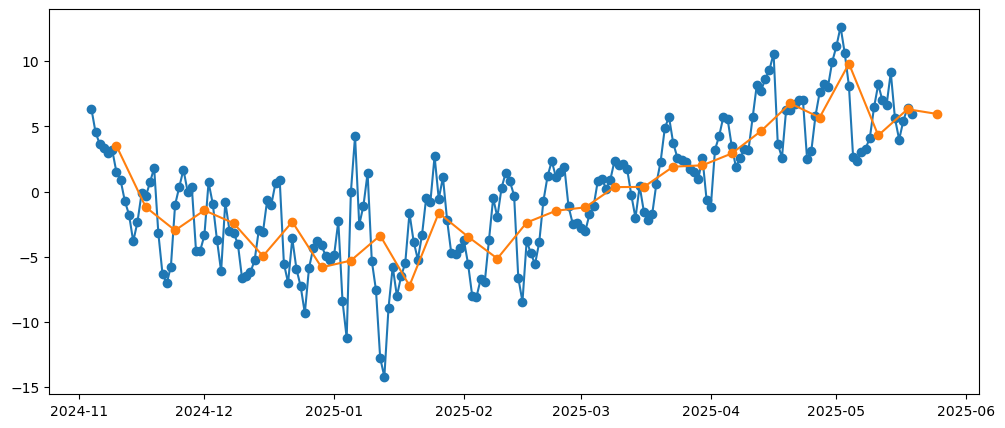

In [48]:
# Créer une série temporelle
df_T_air = pd.DataFrame({
    'temperature': SLF2_temp
}, index=pd.to_datetime(SLF2_date))

# Supprimer les valeurs manquantes (si tu as enlevé certaines valeurs)
df_T_air = df_T_air.dropna()

# Calcul de la moyenne journalière
moyennes_journalières_T_air = df_T_air.resample('D').mean()

#moyenne hebdo
moyenne_hebdo_T_air = df_T_air.resample('W').mean()


# Affichage
plt.figure(figsize=(12, 5))
plt.plot(moyennes_journalières_T_air.index, moyennes_journalières_T_air['temperature'], marker='o', linestyle='-')
plt.plot(moyenne_hebdo_T_air.index, moyenne_hebdo_T_air['temperature'], marker='o', linestyle='-')

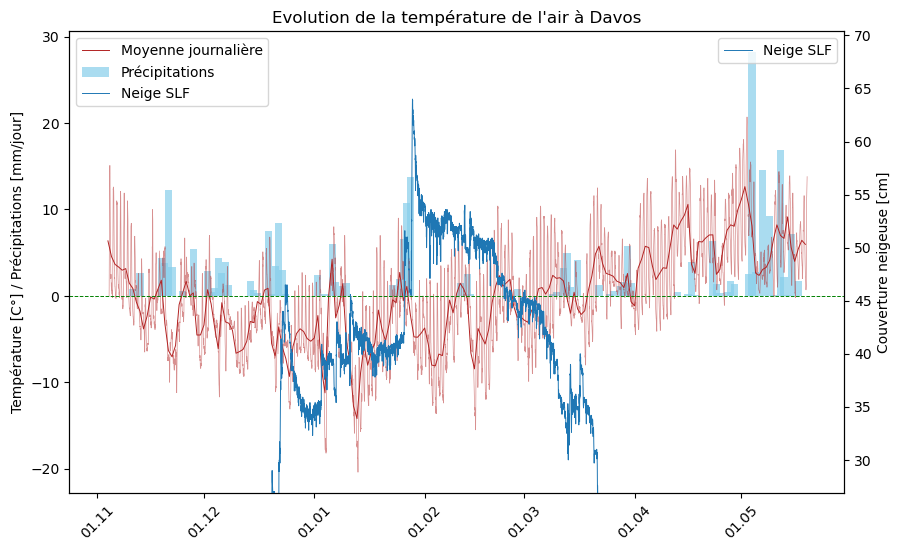

In [57]:
# Création de la figure et des axes
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()  # Deuxième axe pour les précipitations

ax1.plot(SLF2_date, SLF2_temp, lw=0.5, color='firebrick', alpha=0.5)
ax1.plot(moyennes_journalières_T_air.index, moyennes_journalières_T_air['temperature'], lw=0.7, color='firebrick', label='Moyenne journalière')
ax1.axhline(y=0, linestyle='--', color='green', lw=0.7)
ax1.bar(pluie_date, pluie_mm, width=2, color='skyblue', alpha=0.7, label='Précipitations', zorder=0)

ax1.set_ylabel("Température [C°] / Précipitations [mm/jour]")
ax1.set_title('Evolution de la température de l\'air à Davos')

ax2.plot(SLF2_date[:-2000], SLF2_neige[:-2000], lw=0.7, label='Neige SLF')
ax2.set_ylabel("Couverture neigeuse [cm]")

#forcer la ligne de 0 de l'axe 2 
fig.canvas.draw()

# Synchroniser le 0°C de ax1 avec le 0 cm de neige sur ax2
y0 = 0  # point de référence sur ax1
trans = ax1.transData.transform((0, y0))  # coordonnées en pixels de y=0 sur ax1
inv = ax2.transData.inverted()
_, y0_ax2 = inv.transform(trans)  # conversion en coordonnées de ax2

# Fixer les limites de y sur ax2 en mettant 0 cm de neige aligné avec 0°C
ax2.set_ylim(bottom=y0_ax2, top=max(SLF2_neige[:-2000])*1.1)


lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

plt.legend()


# Formattage des dates sur l'axe x
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d.%m'))
ax1.tick_params(axis='x', rotation=45)


# Affichage ou sauvegarde
#plt.savefig('evolution_temp_davos.png', dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
# Créer une série temporelle
df_T_271 = pd.DataFrame({
    'temperature': tot_T_271
}, index=pd.to_datetime(tot_temps_271))

# Supprimer les valeurs manquantes (si tu as enlevé certaines valeurs)
df_T_271 = df_T_271.dropna()

# Calcul de la moyenne journalière
moyennes_journalières_T_271 = df_T_271.resample('D').mean()

# Créer une série temporelle
df_T_274 = pd.DataFrame({
    'temperature': tot_T_274
}, index=pd.to_datetime(tot_temps_274))

# Supprimer les valeurs manquantes (si tu as enlevé certaines valeurs)
df_T_274 = df_T_274.dropna()

# Calcul de la moyenne journalière
moyennes_journalières_T_274 = df_T_274.resample('D').mean()

In [ ]:
print(moyennes_journalières_T_274)

           temperature
2024-11-04    6.148817
2024-11-05    6.117255
2024-11-06    6.065228
2024-11-07    6.011022
2024-11-08    5.955168
...                ...
2025-05-15    3.888176
2025-05-16    3.853168
2025-05-17    3.851145
2025-05-18    3.870242
2025-05-19    3.890411

[197 rows x 1 columns]


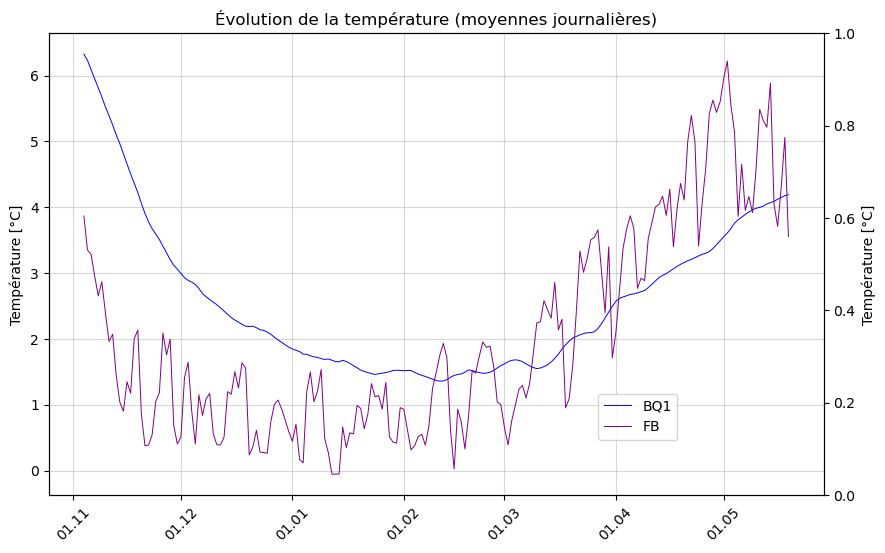

In [ ]:
# Création de la figure et des axes
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()  # Deuxième axe pour les précipitations

# Précipitations en arrière-plan
#ax2.plot(moyennes_journalières_T_air.index, moyennes_journalières_T_air['temperature'], lw=0.7, color='firebrick', alpha=0.7, label='Air')

# Courbes de température
#ax1.plot(tot_temps_271, tot_T_271, color='blue', lw=0.7, label='BQ1')
ax1.plot(moyennes_journalières_T_271.index, moyennes_journalières_T_271['temperature'], lw=0.7, color='blue', label='BQ1')
#ax1.plot(tot_temps_272, tot_T_272, color='orange', lw=0.7, label='BQ2')
#ax1.plot(tot_temps_273, tot_T_273, color='green', lw=0.7, label='BQ3')
#ax1.plot(tot_temps_274, tot_T_274, color='red', lw=0.7, label='BQ4')
#ax1.plot(moyennes_journalières_T_274.index, moyennes_journalières_T_274['temperature'], lw=0.7, color='red', label='BQ4')
#ax1.plot(tot_temps_276[50:], tot_T_276[50:], color='purple', lw=0.2, label='Flüelabach') 
ax1.plot(moyennes_journalières_T.index, moyennes_journalières_T['temperature'], color='purple', lw=0.7, linestyle='-', label='FB')



# Mise en forme
ax1.set_title("Évolution de la température (moyennes journalières)")
ax1.set_ylabel("Température [°C]")
ax2.set_ylabel("Température [°C]")

# Légende combinée
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='center left', bbox_to_anchor=(0.7, 0.17))
#ax1.legend(lines_1, labels_1, loc='center left', bbox_to_anchor=(0.62, 0.18))

ax1.grid(alpha=0.5)

# Formattage des dates sur l'axe x
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d.%m'))
ax1.tick_params(axis='x', rotation=45)

# Affichage ou sauvegarde
#plt.savefig('evolution_temp_fev_sans_precip.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
#from scipy import signal
#correlation = signal.correlate(x, y, mode="full")
#lags = signal.correlation_lags(x.size, y.size, mode="full")
#lag = lags[np.argmax(correlation)]

#print(moyennes_journalières_T_271.index[-5:])
#print(moyennes_journalières_T.index[-5:])

In [ ]:
#Sortir les vecteurs pour faire la correlation dans un nouveau Notebook

#BQ1
df_271_temp = pd.DataFrame({
    "Date": tot_temps_271,
    "Temperature 271": tot_T_271
})
df_271_temp_moy = pd.DataFrame({
    "Jours": moyennes_journalières_T_271.index,
    "Moyenne T": moyennes_journalières_T_271["temperature"]
})
df_271_temp.to_csv("df_temp_271.csv", index=False) 
df_271_temp_moy.to_csv("df_temp_271_moy.csv", index=False) 

#BQ4
df_274_temp = pd.DataFrame({
    "Date": tot_temps_274,
    "Temperature 274": tot_T_274
})
df_274_temp_moy = pd.DataFrame({
    "Jours": moyennes_journalières_T_274.index,
    "Moyenne T": moyennes_journalières_T_274["temperature"]
})
df_274_temp.to_csv("df_temp_274.csv", index=False) 
df_274_temp_moy.to_csv("df_temp_274_moy.csv", index=False) 

#FB
df_276_temp = pd.DataFrame({
    "Date": tot_temps_276,
    "Temperature 276": tot_T_276
})
df_276_temp_moy = pd.DataFrame({
    "Jours": moyennes_journalières_T.index,
    "Moyenne T": moyennes_journalières_T["temperature"]
})
df_276_temp.to_csv("df_temp_276.csv", index=False) 
df_276_temp_moy.to_csv("df_temp_276_moy.csv", index=False) 

#Air
df_air_temp = pd.DataFrame({
    "Date": SLF2_date,
    "Temperature 271": SLF2_temp
})
df_air_temp_moy = pd.DataFrame({
    "Jours": moyennes_journalières_T_air.index,
    "Moyenne T": moyennes_journalières_T_air["temperature"]
})
df_air_temp.to_csv("df_temp_air.csv", index=False) 
df_air_temp_moy.to_csv("df_temp_air_moy.csv", index=False) 


In [ ]:
# Liste des séries à analyser (tu peux en ajouter d'autres ici si besoin)
series_dict = {
    'Air': moyennes_journalières_T_air['temperature'],
    'FB': moyennes_journalières_T['temperature'],
    'BQ1': moyennes_journalières_T_271['temperature'],
    'BQ4': moyennes_journalières_T_274['temperature'],
}

# Trouver l'intersection de toutes les dates
common_index = series_dict['Air'].index
for s in series_dict.values():
    common_index = common_index.intersection(s.index)

# Extraire les données alignées sur l'index commun
aligned_series = {name: series.loc[common_index] for name, series in series_dict.items()}

# FFT pour chaque série
spectres = {}
for name, data in aligned_series.items():
    n = len(data)
    delta_t = 1  # pas de 1 jour
    fft_vals = np.fft.fft(data - data.mean())
    fft_freqs = np.fft.fftfreq(n, d=delta_t)
    positive_freqs = fft_freqs[:n // 2]
    positive_magnitude = np.abs(fft_vals[:n // 2])
    periods = 1 / positive_freqs
    valid = ~np.isinf(periods) & (periods < 60)
    spectres[name] = (periods[valid], positive_magnitude[valid])

# Tracer les spectres
plt.figure(figsize=(10, 5))
for name, (periods, magnitude) in spectres.items():
    plt.plot(periods, magnitude, label=name)
plt.xlabel("Période (jours)")
plt.ylabel("Amplitude spectrale")
plt.title("Analyse spectrale (FFT) des moyennes journalières")
plt.grid(True)
plt.xlim(2, 60)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
print(tot_cond_274[-10:])
print(T_bq1)

[53.48682403564453 52.680015563964844 53.28941345214844 53.455352783203125
 53.09104919433594 53.50303649902344 53.455352783203125 54.2449951171875
 53.833961486816406 52.893638610839844]
[7.1, 2.7, 0.6, 0.7, 1.7, 3.9, 4.9]


In [ ]:
# Convertir en chaînes de caractères
tot_temps_271_str = tot_temps_271.astype(str)

# Nettoyage des chaînes de caractères
tot_temps_271_ind = np.char.strip(tot_temps_271_str)


print(f"Index BQ1 prélèvement : dec - {np.where(tot_temps_271_ind == '2024-12-16 11:30:00')}\n"
      f"Index BQ1 prélèvement : jan - {np.where(tot_temps_271_ind == '2025-01-13 11:00:00')}\n"
      f"Index BQ1 prélèvement : feb - {np.where(tot_temps_271_ind == '2025-02-14 11:00:00')}\n"
      f"Index BQ1 prélèvement : mar - {np.where(tot_temps_271_ind == '2025-03-14 11:00:00')}\n"
      f"Index BQ1 prélèvement : avr - {np.where(tot_temps_271_ind == '2025-04-23 07:00:00')}\n"
      f"Index BQ1 prélèvement : mai - {np.where(tot_temps_271_ind == '2025-05-19 07:00:00')}")

Index BQ1 prélèvement : dec - (array([4039], dtype=int64),)
Index BQ1 prélèvement : jan - (array([6723], dtype=int64),)
Index BQ1 prélèvement : feb - (array([9793], dtype=int64),)
Index BQ1 prélèvement : mar - (array([12480], dtype=int64),)
Index BQ1 prélèvement : avr - (array([16304], dtype=int64),)
Index BQ1 prélèvement : mai - (array([18799], dtype=int64),)


In [ ]:
print(tot_temps_271[0])
print(tot_cond_277[2170])

2024-11-04 09:30:00
44.12841796875


In [ ]:
print(cond_274_04[-5:])
print(cond_276_04[:10])

[56.93244934082031 56.59198760986328 56.45942687988281 56.89716339111328 0]
[92.864990234375 159.24072265625 109.283447265625 95.91484069824219
 90.8203125 88.14620971679688 87.10861206054688 86.69471740722656
 86.67564392089844 86.74812316894531]


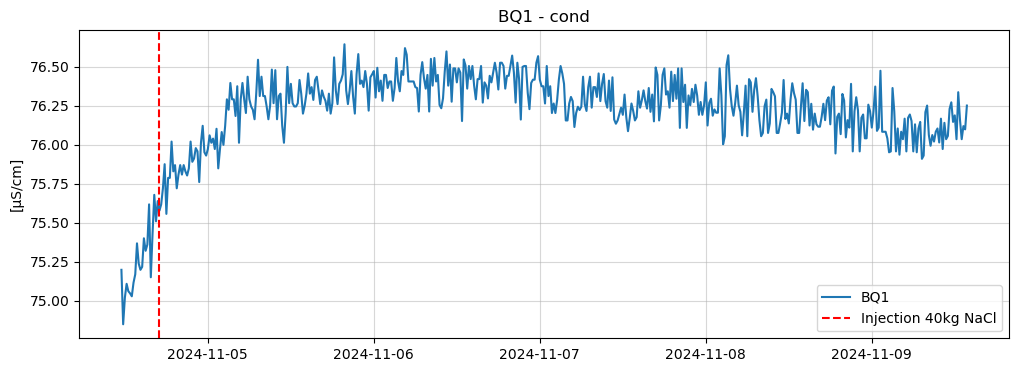

In [ ]:
import datetime
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
plt.plot(temps_271_12[10:500], cond_271_12[10:500], label = 'BQ1')

#plt.plot(temps_276_12[10:100], cond_276_12[10:100], lw=0.7, label = 'FB')
plt.axvline(x=datetime.datetime(2024, 11, 4, 17, 0), color='r', linestyle='--', label='Injection 40kg NaCl')
plt.title('BQ1 - cond')
plt.legend()
plt.ylabel('[μS/cm]')
plt.grid(alpha=0.5)
plt.show()

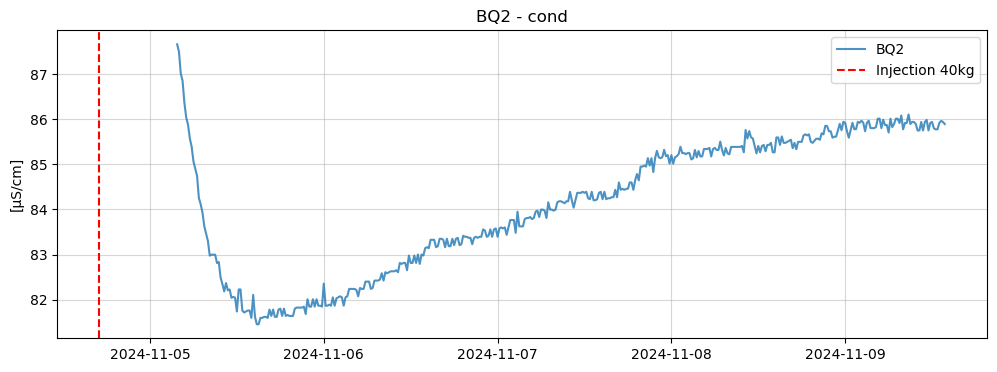

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(temps_272_12[75:500], cond_272_12[75:500], alpha=0.8, label = 'BQ2')
plt.axvline(x=datetime.datetime(2024, 11, 4, 17, 0), color='r', linestyle='--', label='Injection 40kg')
plt.title('BQ2 - cond')
plt.legend()
plt.ylabel('[μS/cm]')
plt.grid(alpha=0.5)
plt.show()

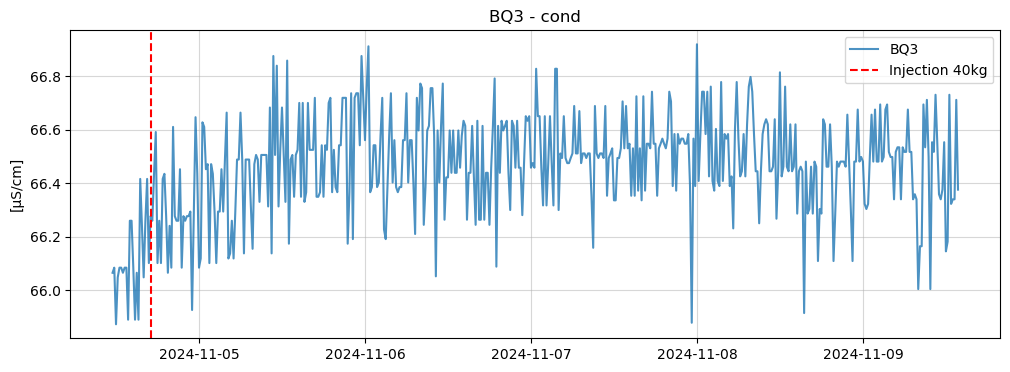

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(temps_273_12[10:500], cond_273_12[10:500], alpha=0.8, label = 'BQ3')
plt.axvline(x=datetime.datetime(2024, 11, 4, 17, 0), color='r', linestyle='--', label='Injection 40kg')
plt.title('BQ3 - cond')
plt.legend()
plt.ylabel('[μS/cm]')
plt.grid(alpha=0.5)
plt.show()

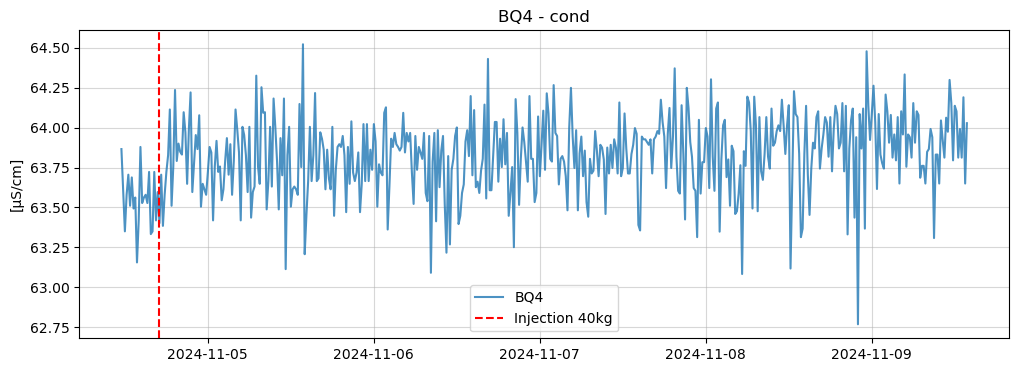

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(temps_274_12[10:500], cond_274_12[10:500], alpha=0.8, label = 'BQ4')
plt.axvline(x=datetime.datetime(2024, 11, 4, 17, 0), color='r', linestyle='--', label='Injection 40kg')
plt.title('BQ4 - cond')
plt.legend()
plt.ylabel('[μS/cm]')
plt.grid(alpha=0.5)
plt.show()

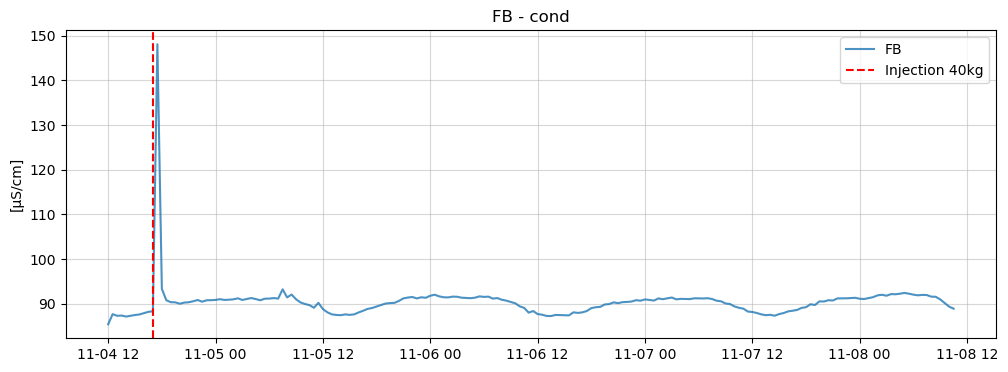

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(temps_276_12[10:200], cond_276_12[10:200], alpha=0.8, label = 'FB')
plt.axvline(x=datetime.datetime(2024, 11, 4, 17, 0), color='r', linestyle='--', label='Injection 40kg')
plt.title('FB - cond')
plt.legend()
plt.ylabel('[μS/cm]')
plt.grid(alpha=0.5)
plt.show()

In [ ]:
print(' BQ1 : ',T_271_12[:10]) #2
print('\n BQ2 : ',T_272_12[:10]) #4
print('\n BQ3 : ',T_273_12[:10]) #5
print('\n BQ4 : ',T_274_12[:10]) #5
print('\n FB : ',T_276_12[:20]) #10
print('\n FQ : ',T_277_12[:20]) #12

 BQ1 :  [16.0380859375 7.6771240234375 6.3228759765625 6.3089599609375
 6.3367919921875 6.3505859375 6.329833984375 6.3992919921875
 6.3367919921875 6.3714599609375]

 BQ2 :  [14.747314453125 12.187255859375 16.34765625 19.048828125 7.779296875
 7.1815185546875 7.0772705078125 7.03564453125 7.0078125 6.993896484375]

 BQ3 :  [13.0146484375 14.15478515625 15.907470703125 19.31640625 16.4287109375
 6.1357421875 6.1287841796875 6.1287841796875 6.1357421875 6.1427001953125]

 BQ4 :  [13.3798828125 15.884033203125 20.115234375 22.7197265625 19.58642578125
 6.623779296875 6.1097412109375 6.1861572265625 6.1513671875 6.1513671875]

 FB :  [19.24365234375 17.88623046875 16.86279296875 15.909423828125
 12.74365234375 12.08984375 11.783935546875 11.51953125 12.7158203125
 16.15966796875 4.49267578125 4.5830078125 4.5830078125 4.61767578125
 4.5274658203125 4.43017578125 4.381591796875 4.3468017578125
 4.2703857421875 4.138427734375]

 FQ :  [19.1435546875 17.66162109375 16.46484375 15.2199707031

In [ ]:
print(' BQ1 : ', T_271_01[-5:] ,T_271_02[:5]) #2
print('\n BQ2 : ', T_272_01[-5:] ,T_272_02[:5]) #4
print('\n BQ3 : ', T_273_01[-5:] ,T_273_02[:5]) #5
print('\n BQ4 : ', T_274_01[-5:] ,T_274_02[:5]) #5
print('\n FB : ', T_276_12[-5:] ,T_276_02[:5]) #10
print('\n FQ : ', T_277_01[-5:] ,T_277_02[:5]) #12

 BQ1 :  [1.67205810546875 1.66510009765625 1.658172607421875 1.637359619140625
 -1.886566162109375] [1.03369140625 1.66510009765625 1.6859130859375 1.66510009765625
 1.651214599609375]

 BQ2 :  [3.054931640625 3.04803466796875 3.04803466796875 3.04803466796875
 -0.3956451416015625] [2.22857666015625 2.8118896484375 2.92303466796875 2.97161865234375
 2.992431640625]

 BQ3 :  [3.86541748046875 3.837646484375 3.85150146484375 3.86541748046875
 3.85150146484375] [3.88623046875 3.8931884765625 3.8931884765625 3.8931884765625
 3.90008544921875]

 BQ4 :  [2.7972412109375 2.80413818359375 2.790283203125 2.80413818359375
 2.82501220703125] [2.8388671875 2.81109619140625 2.76947021484375 2.81109619140625
 2.82501220703125]

 FB :  [1.832794189453125 1.82586669921875 1.7841796875 1.7286376953125
 1.7286376953125] [1.63836669921875 1.6175537109375 1.610595703125 1.610595703125
 1.58978271484375]

 FQ :  [0.7354736328125 0.742401123046875 0.7632293701171875 0.742401123046875
 0.7701568603515625] [0

In [ ]:
print(len(tot_temps_271))
print(len(tot_temps_272))
print(len(tot_temps_273))
print(len(tot_temps_274))
print(len(tot_temps_276))
print(len(tot_temps_277))
print(len(tot_temps_261))

18807
18807
18811
18807
9398
9395
18799


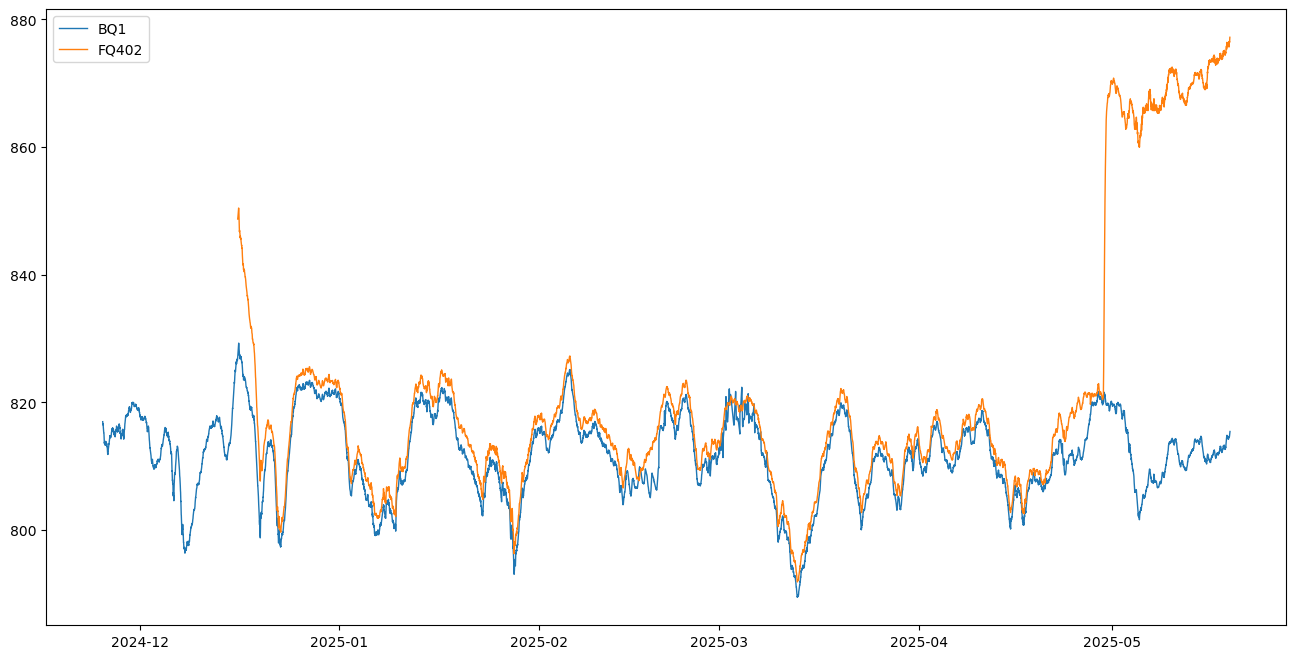

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(tot_temps_261[2000:], tot_mbar_261[2000:], lw=1, label='BQ1')
plt.plot(tot_temps_277[2000:], tot_mbar_277[2000:], lw=1, label='FQ402')
plt.legend()
plt.show()